### Import necessary libraries and packages

In [1]:
#import os #Might want to reset kernel/env
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker
import sys
!{sys.executable} -m pip install piecewise-regression
import piecewise_regression #For piecewise fit of a continuous curve

# Abstract

As MOSEFET gate lengths $(L)$ are scaled ever lower to achieve greater compute per unit die area, studies **[[1]](https://www.chu.berkeley.edu/modern-semiconductor-devices-for-integrated-circuits-chenming-calvin-hu-2010/)** indicate an increasing subthreshold leakage current $(I_{OFF})$ and an increasing drain current w.r.t source $(I_{ON}/I_{d})$ due to lowering gate threshold barrier $(V_T)$, according to the following equations - 

<a id="eq1"></a>
$$
\begin{equation}\tag{1}
V_T^{\prime} = V_{T-long} - (V_{d}+0.4V)\cdot e^{\frac{-L}{\sqrt[3]{T_{oxe}\cdot W_{dep}\cdot {X_j}}}}
\end{equation}
$$

<a id="eq2"></a>
$$
\begin{equation}\tag{2}
I_{OFF} = 100\cdot \frac{W}{L}\cdot 10^{\frac{-qV_T}{\eta kT}} = 100\cdot \frac{W}{L}\cdot 10^{\frac{-V_T}{S}}
\end{equation}
$$

<a id="eq3"></a>
$$
\begin{equation}\tag{3}
I_{ON} = 100\cdot \frac{W}{L}\cdot 10^{\frac{q(V_g-V_T)}{\eta kT}} = 100\cdot \frac{W}{L}\cdot 10^{\frac{(V_g-V_T)}{S}}
\end{equation}
$$

Hence the purpose of this Lab is to verify these relations in scaling down of horizontal MOSEFET dimensions $(L)$, vertical MOSFET  dimensions (electrical equivalent oxide thickness $T_{oxe}$ / depletion-layer width $W_{dep}$ / drain junction depth ${X_j}$) and the supply voltage $(V_{DD})$ - through nanoHUB simulations and experimental measurements at 300K. Additionally, the effect of gate electrode workfunction $(\psi_g)$ on $V_T$ (as studied in **[[1]](https://www.chu.berkeley.edu/modern-semiconductor-devices-for-integrated-circuits-chenming-calvin-hu-2010/)**) is verified, according to the following equation -

<a id="eq4"></a>
$$
\begin{equation}\tag{4}
V_T^{\prime} = V_T + \Delta \psi_g 
\end{equation}
$$

# Table of Contents
- **[Part I: Gate-characteristics and threshold voltage roll-off](#Part-I:-Gate-characteristics-and-threshold-voltage-roll-off)**
    - **[[Simulated] $I_d/V_g$ for N-MOSFET with constant oxide thickness $(t_{ox})$](#section_1_1)**
        - **[Summary](#section_1_1_1)**
- **[Part II: Scaling of oxide thickness and supply voltage](#Part-II:-Scaling-of-oxide-thickness-and-supply-voltage)**
    - **[[Simulated] $I_d/V_g$ for N-MOSFET with scaled oxide thickness $(t_{ox}^{\prime})$ and supply voltage $(V_{DD}^{\prime})$](#section_2_1)**
        - **[Summary](#section_2_1_1)**
- **[Part III: Compact model comparison](#Part-III:-Compact-model-comparison)**
    - **[[Simulated] $I_d/V_g$ for N-MOSFET with constant oxide thickness $(t_{ox})$](#section_3_1)**
        - **[Summary](#section_3_1_1)**
- **[Part IV: Comparison with measured data for N SOI MOSFETs](#Part-IV:-Comparison-with-measured-data-for-N-SOI-MOSFETs)**
    - **[[Measured vs Simulated] $I_d/V_g$ for NMOS SOI MOSFET with constant oxide thickness $(t_{ox})$](#section_4_1)**
        - **[Summary](#section_4_1_1)**
    - **[[Measured vs Simulated] $I_d/V_d$ for NMOS SOI MOSFET with constant oxide thickness $(t_{ox})$](#section_4_2)**
        - **[Summary](#section_4_2_1)**
- **[Discussion and Conclusion](#Discussion-and-Conclusion)**
- **[References](#References)**

# Part I: Gate-characteristics and threshold voltage roll-off

## [Simulated] $I_d/V_g$ for N-MOSFET with constant oxide thickness $(t_{ox})$ <a class="anchor" id="section_1_1"></a>

In [2]:
#Reading data
NIdVg_90nm_Vd005 = pd.read_csv('Simulations/N-L90nm-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_90nm_Vd1 = pd.read_csv('Simulations/N-L90nm-IdVg.txt', skiprows=109,nrows=118,header=None)

NIdVg_65nm_Vd005 = pd.read_csv('Simulations/N-L65nm-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_65nm_Vd1 = pd.read_csv('Simulations/N-L65nm-IdVg.txt', skiprows=109,nrows=118,header=None)

NIdVg_45nm_Vd005 = pd.read_csv('Simulations/N-L45nm-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_45nm_Vd1 = pd.read_csv('Simulations/N-L45nm-IdVg.txt', skiprows=109,nrows=302,header=None)

NIdVg_32nm_Vd005 = pd.read_csv('Simulations/N-L32nm-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_32nm_Vd1 = pd.read_csv('Simulations/N-L32nm-IdVg.txt', skiprows=109,nrows=105,header=None)

NIdVg_22nm_Vd005 = pd.read_csv('Simulations/N-L22nm-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_22nm_Vd1 = pd.read_csv('Simulations/N-L22nm-IdVg.txt', skiprows=109,nrows=118,header=None)

Text(0, 0.5, '$I_d (A)$')

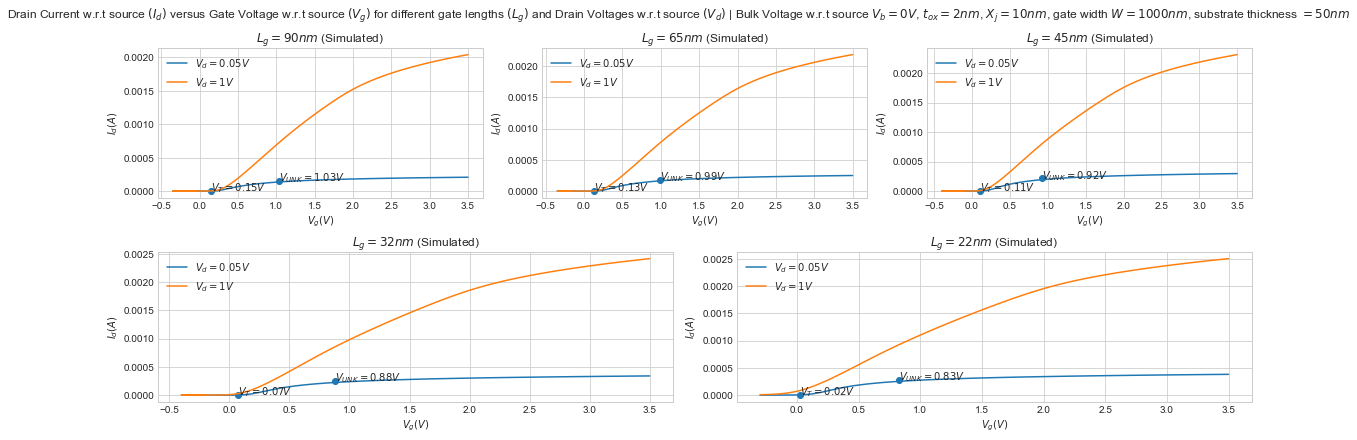

In [3]:
#Plotting data
fig = plt.figure(constrained_layout=True,figsize=(16, 6))
fig.suptitle('Drain Current w.r.t source $(I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltages w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $t_{ox} = 2nm$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')
gs0 = fig.add_gridspec(2, 1)
gs00 = gs0[0].subgridspec(1, 3)
gs01 = gs0[1].subgridspec(1, 2)

fig.add_subplot(gs00[0, 0])
plt.plot(NIdVg_90nm_Vd005[0], NIdVg_90nm_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_90nm_Vd1[0], NIdVg_90nm_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_90nm_Vd005 = piecewise_regression.Fit(NIdVg_90nm_Vd005[0].to_numpy(), NIdVg_90nm_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_90nm_Vd005 = pw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_90nm_Vd005 = pw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_90nm_Vd005+pw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_90nm_Vd005,Id_VT_NIdVg_90nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_90nm_Vd005:.2f}V$', (VT_NIdVg_90nm_Vd005, Id_VT_NIdVg_90nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_90nm_Vd005 = pw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_90nm_Vd005 = pw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_90nm_Vd005-VT_NIdVg_90nm_Vd005)+Id_VT_NIdVg_90nm_Vd005
plt.scatter(Vunk_NIdVg_90nm_Vd005,Idunk_VT_NIdVg_90nm_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_90nm_Vd005:.2f}V$', (Vunk_NIdVg_90nm_Vd005, Idunk_VT_NIdVg_90nm_Vd005))
plt.legend(loc='best')
plt.title('$L_g = 90nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')

fig.add_subplot(gs00[0, 1])
plt.plot(NIdVg_65nm_Vd005[0], NIdVg_65nm_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_65nm_Vd1[0], NIdVg_65nm_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_65nm_Vd005 = piecewise_regression.Fit(NIdVg_65nm_Vd005[0].to_numpy(), NIdVg_65nm_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_65nm_Vd005 = pw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_65nm_Vd005 = pw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_65nm_Vd005+pw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_65nm_Vd005,Id_VT_NIdVg_65nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_65nm_Vd005:.2f}V$', (VT_NIdVg_65nm_Vd005, Id_VT_NIdVg_65nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_65nm_Vd005 = pw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_65nm_Vd005 = pw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_65nm_Vd005-VT_NIdVg_65nm_Vd005)+Id_VT_NIdVg_65nm_Vd005
plt.scatter(Vunk_NIdVg_65nm_Vd005,Idunk_VT_NIdVg_65nm_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_65nm_Vd005:.2f}V$', (Vunk_NIdVg_65nm_Vd005, Idunk_VT_NIdVg_65nm_Vd005))
plt.legend(loc='best')
plt.title('$L_g = 65nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')

fig.add_subplot(gs00[0, 2])
plt.plot(NIdVg_45nm_Vd005[0], NIdVg_45nm_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_45nm_Vd1[0], NIdVg_45nm_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_45nm_Vd005 = piecewise_regression.Fit(NIdVg_45nm_Vd005[0].to_numpy(), NIdVg_45nm_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_Vd005 = pw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_Vd005 = pw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_Vd005+pw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_45nm_Vd005,Id_VT_NIdVg_45nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_45nm_Vd005:.2f}V$', (VT_NIdVg_45nm_Vd005, Id_VT_NIdVg_45nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_45nm_Vd005 = pw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_Vd005 = pw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_Vd005-VT_NIdVg_45nm_Vd005)+Id_VT_NIdVg_45nm_Vd005
plt.scatter(Vunk_NIdVg_45nm_Vd005,Idunk_VT_NIdVg_45nm_Vd005,marker='o', c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_45nm_Vd005:.2f}V$', (Vunk_NIdVg_45nm_Vd005, Idunk_VT_NIdVg_45nm_Vd005))
plt.legend(loc='best')
plt.title('$L_g = 45nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')

fig.add_subplot(gs01[0, 0])
plt.plot(NIdVg_32nm_Vd005[0], NIdVg_32nm_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_32nm_Vd1[0], NIdVg_32nm_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_32nm_Vd005 = piecewise_regression.Fit(NIdVg_32nm_Vd005[0].to_numpy(),NIdVg_32nm_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_32nm_Vd005 = pw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_32nm_Vd005 = pw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_32nm_Vd005+pw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_32nm_Vd005,Id_VT_NIdVg_32nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_32nm_Vd005:.2f}V$', (VT_NIdVg_32nm_Vd005, Id_VT_NIdVg_32nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_32nm_Vd005 = pw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_32nm_Vd005 = pw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_32nm_Vd005-VT_NIdVg_32nm_Vd005)+Id_VT_NIdVg_32nm_Vd005
plt.scatter(Vunk_NIdVg_32nm_Vd005,Idunk_VT_NIdVg_32nm_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_32nm_Vd005:.2f}V$', (Vunk_NIdVg_32nm_Vd005, Idunk_VT_NIdVg_32nm_Vd005))
plt.legend(loc='best')
plt.title('$L_g = 32nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')

fig.add_subplot(gs01[0, 1])
plt.plot(NIdVg_22nm_Vd005[0], NIdVg_22nm_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_22nm_Vd1[0], NIdVg_22nm_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_22nm_Vd005 = piecewise_regression.Fit(NIdVg_22nm_Vd005[0].to_numpy(),NIdVg_22nm_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_22nm_Vd005 = pw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_22nm_Vd005 = pw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_22nm_Vd005+pw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_22nm_Vd005,Id_VT_NIdVg_22nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_22nm_Vd005:.2f}V$', (VT_NIdVg_22nm_Vd005, Id_VT_NIdVg_22nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_22nm_Vd005 = pw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_22nm_Vd005 = pw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_22nm_Vd005-VT_NIdVg_22nm_Vd005)+Id_VT_NIdVg_22nm_Vd005
plt.scatter(Vunk_NIdVg_22nm_Vd005,Idunk_VT_NIdVg_22nm_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_22nm_Vd005:.2f}V$', (Vunk_NIdVg_22nm_Vd005, Idunk_VT_NIdVg_22nm_Vd005))
plt.legend(loc='best')
plt.title('$L_g = 22nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')

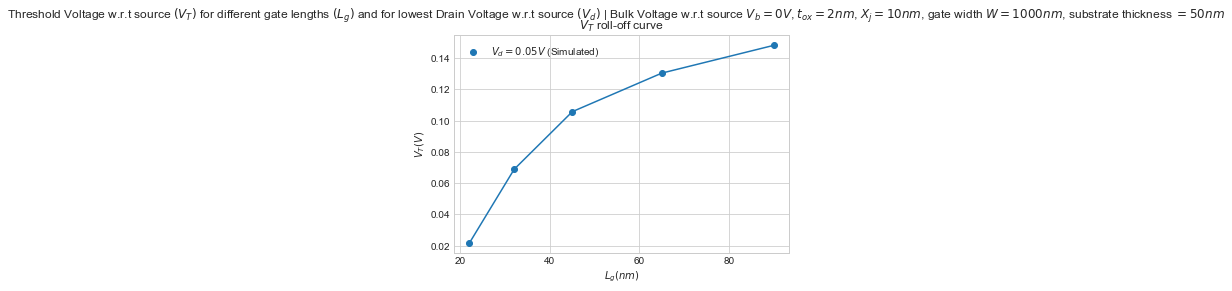

In [4]:
fig,axes = plt.subplots()
fig.suptitle('Threshold Voltage w.r.t source $(V_T)$ for different gate lengths $(L_g)$ and for lowest Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $t_{ox} = 2nm$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')
plt.scatter([22,32,45,65,90],[VT_NIdVg_22nm_Vd005,VT_NIdVg_32nm_Vd005,VT_NIdVg_45nm_Vd005,VT_NIdVg_65nm_Vd005,VT_NIdVg_90nm_Vd005],marker='o',label='$V_d = 0.05V$ (Simulated)')
plt.plot([22,32,45,65,90],[VT_NIdVg_22nm_Vd005,VT_NIdVg_32nm_Vd005,VT_NIdVg_45nm_Vd005,VT_NIdVg_65nm_Vd005,VT_NIdVg_90nm_Vd005])
axes.legend(loc='best')
axes.set_xlabel('$L_g (nm)$')
axes.set_ylabel('$V_T (V)$')
axes.set_title('$V_T$ roll-off curve')
axes.xaxis.set_major_locator(ticker.MultipleLocator(20))

Text(0, 0.5, '$\\log I_d (A)$')

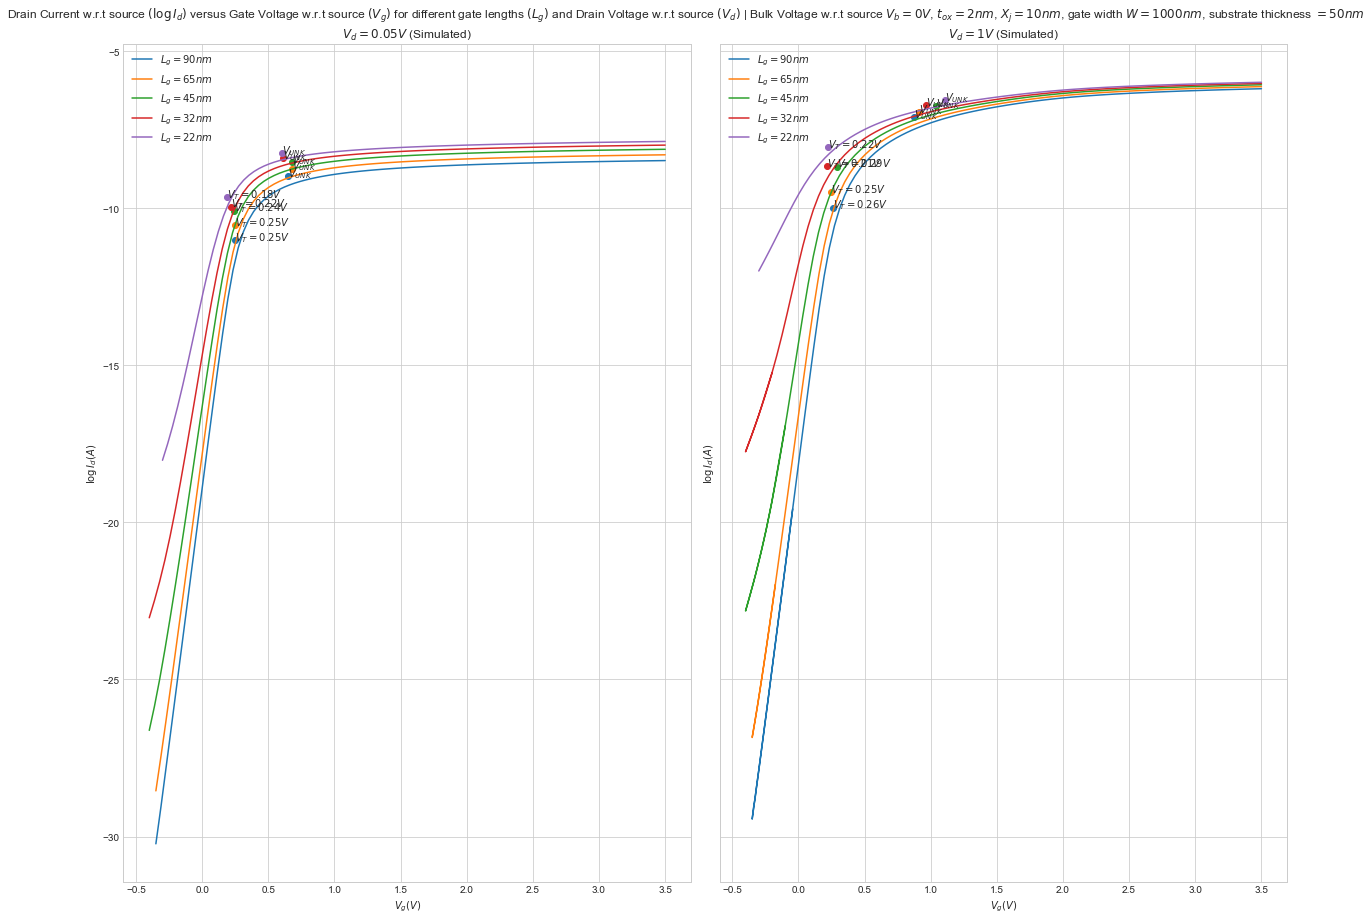

In [5]:
#Plotting data (logy vs x)
fig_SS, ax_SS = plt.subplots(nrows=1,ncols=2,tight_layout=True,sharex=True,sharey=True,figsize=(17, 13))
fig_SS.suptitle('Drain Current w.r.t source $(\log I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $t_{ox} = 2nm$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')

plt.subplot(121)
plt.plot(NIdVg_90nm_Vd005[0].to_numpy(), np.log(NIdVg_90nm_Vd005[1].to_numpy()), label='$L_g = 90nm$')
logpw_fit_NIdVg_90nm_Vd005 = piecewise_regression.Fit(NIdVg_90nm_Vd005[0].to_numpy(),np.log(NIdVg_90nm_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_90nm_Vd005 = logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_90nm_Vd005 = logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_90nm_Vd005+logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_90nm_Vd005,IdSS_VT_NIdVg_90nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_90nm_Vd005:.2f}V$', (VTSS_NIdVg_90nm_Vd005, IdSS_VT_NIdVg_90nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_90nm_Vd005 = logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_90nm_Vd005 = logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_90nm_Vd005-VTSS_NIdVg_90nm_Vd005)+IdSS_VT_NIdVg_90nm_Vd005
plt.scatter(VSSunk_NIdVg_90nm_Vd005,IdSSunk_VT_NIdVg_90nm_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_90nm_Vd005, IdSSunk_VT_NIdVg_90nm_Vd005))

plt.plot(NIdVg_65nm_Vd005[0].to_numpy(), np.log(NIdVg_65nm_Vd005[1].to_numpy()), label='$L_g = 65nm$')
logpw_fit_NIdVg_65nm_Vd005 = piecewise_regression.Fit(NIdVg_65nm_Vd005[0].to_numpy(),np.log(NIdVg_65nm_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_65nm_Vd005 = logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_65nm_Vd005 = logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_65nm_Vd005+logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_65nm_Vd005,IdSS_VT_NIdVg_65nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_65nm_Vd005:.2f}V$', (VTSS_NIdVg_65nm_Vd005, IdSS_VT_NIdVg_65nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_65nm_Vd005 = logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_65nm_Vd005 = logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_65nm_Vd005-VTSS_NIdVg_65nm_Vd005)+IdSS_VT_NIdVg_65nm_Vd005
plt.scatter(VSSunk_NIdVg_65nm_Vd005,IdSSunk_VT_NIdVg_65nm_Vd005,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_65nm_Vd005, IdSSunk_VT_NIdVg_65nm_Vd005))

plt.plot(NIdVg_45nm_Vd005[0].to_numpy(), np.log(NIdVg_45nm_Vd005[1].to_numpy()), label='$L_g = 45nm$')
logpw_fit_NIdVg_45nm_Vd005 = piecewise_regression.Fit(NIdVg_45nm_Vd005[0].to_numpy(),np.log(NIdVg_45nm_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_45nm_Vd005 = logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_Vd005 = logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_Vd005+logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_Vd005,IdSS_VT_NIdVg_45nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_Vd005:.2f}V$', (VTSS_NIdVg_45nm_Vd005, IdSS_VT_NIdVg_45nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_45nm_Vd005 = logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_Vd005 = logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_Vd005-VTSS_NIdVg_45nm_Vd005)+IdSS_VT_NIdVg_45nm_Vd005
plt.scatter(VSSunk_NIdVg_45nm_Vd005,IdSSunk_VT_NIdVg_45nm_Vd005,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_Vd005, IdSSunk_VT_NIdVg_45nm_Vd005))

plt.plot(NIdVg_32nm_Vd005[0].to_numpy(), np.log(NIdVg_32nm_Vd005[1].to_numpy()), label='$L_g = 32nm$')
logpw_fit_NIdVg_32nm_Vd005 = piecewise_regression.Fit(NIdVg_32nm_Vd005[0].to_numpy(),np.log(NIdVg_32nm_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_32nm_Vd005 = logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_32nm_Vd005 = logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_32nm_Vd005+logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_32nm_Vd005,IdSS_VT_NIdVg_32nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_32nm_Vd005:.2f}V$', (VTSS_NIdVg_32nm_Vd005, IdSS_VT_NIdVg_32nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_32nm_Vd005 = logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_32nm_Vd005 = logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_32nm_Vd005-VTSS_NIdVg_32nm_Vd005)+IdSS_VT_NIdVg_32nm_Vd005
plt.scatter(VSSunk_NIdVg_32nm_Vd005,IdSSunk_VT_NIdVg_32nm_Vd005,marker='o',c='#d62728')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_32nm_Vd005, IdSSunk_VT_NIdVg_32nm_Vd005))

plt.plot(NIdVg_22nm_Vd005[0].to_numpy(), np.log(NIdVg_22nm_Vd005[1].to_numpy()), label='$L_g = 22nm$')
logpw_fit_NIdVg_22nm_Vd005 = piecewise_regression.Fit(NIdVg_22nm_Vd005[0].to_numpy(),np.log(NIdVg_22nm_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_22nm_Vd005 = logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_22nm_Vd005 = logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_22nm_Vd005+logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_22nm_Vd005,IdSS_VT_NIdVg_22nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_22nm_Vd005:.2f}V$', (VTSS_NIdVg_22nm_Vd005, IdSS_VT_NIdVg_22nm_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_22nm_Vd005 = logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_22nm_Vd005 = logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_22nm_Vd005-VTSS_NIdVg_22nm_Vd005)+IdSS_VT_NIdVg_22nm_Vd005
plt.scatter(VSSunk_NIdVg_22nm_Vd005,IdSSunk_VT_NIdVg_22nm_Vd005,marker='o',c='#9467bd')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_22nm_Vd005, IdSSunk_VT_NIdVg_22nm_Vd005))

plt.legend(loc='best')
plt.title('$V_d = 0.05V$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(122)
plt.plot(NIdVg_90nm_Vd1[0].to_numpy(), np.log(NIdVg_90nm_Vd1[1].to_numpy()), label='$L_g = 90nm$')
logpw_fit_NIdVg_90nm_Vd1 = piecewise_regression.Fit(NIdVg_90nm_Vd1[0].to_numpy(),np.log(NIdVg_90nm_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_90nm_Vd1 = logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_90nm_Vd1 = logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_90nm_Vd1+logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_90nm_Vd1,IdSS_VT_NIdVg_90nm_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_90nm_Vd1:.2f}V$', (VTSS_NIdVg_90nm_Vd1, IdSS_VT_NIdVg_90nm_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_90nm_Vd1 = logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_90nm_Vd1 = logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_90nm_Vd1-VTSS_NIdVg_90nm_Vd1)+IdSS_VT_NIdVg_90nm_Vd1
plt.scatter(VSSunk_NIdVg_90nm_Vd1,IdSSunk_VT_NIdVg_90nm_Vd1,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_90nm_Vd1, IdSSunk_VT_NIdVg_90nm_Vd1))

plt.plot(NIdVg_65nm_Vd1[0].to_numpy(), np.log(NIdVg_65nm_Vd1[1].to_numpy()), label='$L_g = 65nm$')
logpw_fit_NIdVg_65nm_Vd1 = piecewise_regression.Fit(NIdVg_65nm_Vd1[0].to_numpy(),np.log(NIdVg_65nm_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_65nm_Vd1 = logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_65nm_Vd1 = logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_65nm_Vd1+logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_65nm_Vd1,IdSS_VT_NIdVg_65nm_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_65nm_Vd1:.2f}V$', (VTSS_NIdVg_65nm_Vd1, IdSS_VT_NIdVg_65nm_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_65nm_Vd1 = logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_65nm_Vd1 = logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_65nm_Vd1-VTSS_NIdVg_65nm_Vd1)+IdSS_VT_NIdVg_65nm_Vd1
plt.scatter(VSSunk_NIdVg_65nm_Vd1,IdSSunk_VT_NIdVg_65nm_Vd1,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_65nm_Vd1, IdSSunk_VT_NIdVg_65nm_Vd1))

plt.plot(NIdVg_45nm_Vd1[0].to_numpy(), np.log(NIdVg_45nm_Vd1[1].to_numpy()), label='$L_g = 45nm$')
logpw_fit_NIdVg_45nm_Vd1 = piecewise_regression.Fit(NIdVg_45nm_Vd1[0].to_numpy()[33:],np.log(NIdVg_45nm_Vd1[1].to_numpy()[33:]), n_breakpoints=2)
VTSS_NIdVg_45nm_Vd1 = logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_Vd1 = logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_Vd1+logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_Vd1,IdSS_VT_NIdVg_45nm_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_Vd1:.2f}V$', (VTSS_NIdVg_45nm_Vd1, IdSS_VT_NIdVg_45nm_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_45nm_Vd1 = logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_Vd1 = logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_Vd1-VTSS_NIdVg_45nm_Vd1)+IdSS_VT_NIdVg_45nm_Vd1
plt.scatter(VSSunk_NIdVg_45nm_Vd1,IdSSunk_VT_NIdVg_45nm_Vd1,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_Vd1, IdSSunk_VT_NIdVg_45nm_Vd1))

plt.plot(NIdVg_32nm_Vd1[0].to_numpy(), np.log(NIdVg_32nm_Vd1[1].to_numpy()), label='$L_g = 32nm$')
logpw_fit_NIdVg_32nm_Vd1 = piecewise_regression.Fit(NIdVg_32nm_Vd1[0].to_numpy(),np.log(NIdVg_32nm_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_32nm_Vd1 = logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_32nm_Vd1 = logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_32nm_Vd1+logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_32nm_Vd1,IdSS_VT_NIdVg_32nm_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_32nm_Vd1:.2f}V$', (VTSS_NIdVg_32nm_Vd1, IdSS_VT_NIdVg_32nm_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_32nm_Vd1 = logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_32nm_Vd1 = logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_32nm_Vd1-VTSS_NIdVg_32nm_Vd1)+IdSS_VT_NIdVg_32nm_Vd1
plt.scatter(VSSunk_NIdVg_32nm_Vd1,IdSSunk_VT_NIdVg_32nm_Vd1,marker='o',c='#d62728')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_32nm_Vd1, IdSSunk_VT_NIdVg_32nm_Vd1))

plt.plot(NIdVg_22nm_Vd1[0].to_numpy(), np.log(NIdVg_22nm_Vd1[1].to_numpy()), label='$L_g = 22nm$')
logpw_fit_NIdVg_22nm_Vd1 = piecewise_regression.Fit(NIdVg_22nm_Vd1[0].to_numpy(),np.log(NIdVg_22nm_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_22nm_Vd1 = logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_22nm_Vd1 = logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_22nm_Vd1+logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_22nm_Vd1,IdSS_VT_NIdVg_22nm_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_22nm_Vd1:.2f}V$', (VTSS_NIdVg_22nm_Vd1, IdSS_VT_NIdVg_22nm_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_22nm_Vd1 = logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_22nm_Vd1 = logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_22nm_Vd1-VTSS_NIdVg_22nm_Vd1)+IdSS_VT_NIdVg_22nm_Vd1
plt.scatter(VSSunk_NIdVg_22nm_Vd1,IdSSunk_VT_NIdVg_22nm_Vd1,marker='o',c='#9467bd')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_22nm_Vd1, IdSSunk_VT_NIdVg_22nm_Vd1))

plt.legend(loc='best')
plt.title('$V_d = 1V$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

In [6]:
SS_NIdVg_90nm_Vd005 = (1/(logpw_fit_NIdVg_90nm_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000 #Sub-threshold Swing (SS) estimate
SS_NIdVg_65nm_Vd005 = (1/(logpw_fit_NIdVg_65nm_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_45nm_Vd005 = (1/(logpw_fit_NIdVg_45nm_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_32nm_Vd005 = (1/(logpw_fit_NIdVg_32nm_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_22nm_Vd005 = (1/(logpw_fit_NIdVg_22nm_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000

pw_fit_NIdVg_90nm_Vd1 = piecewise_regression.Fit(NIdVg_90nm_Vd1[0].to_numpy(),NIdVg_90nm_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_90nm_Vd1 = pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_90nm_Vd1 = pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_90nm_Vd1+pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_90nm_Vd1 = pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_90nm_Vd1 = pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_90nm_Vd1-VT_NIdVg_90nm_Vd1)+Id_VT_NIdVg_90nm_Vd1
Ion_NIdVg_90nm_Vd1 = pw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_90nm_Vd1)+Idunk_VT_NIdVg_90nm_Vd1

pw_fit_NIdVg_65nm_Vd1 = piecewise_regression.Fit(NIdVg_65nm_Vd1[0].to_numpy(),NIdVg_65nm_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_65nm_Vd1 = pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_65nm_Vd1 = pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_65nm_Vd1+pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_65nm_Vd1 = pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_65nm_Vd1 = pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_65nm_Vd1-VT_NIdVg_65nm_Vd1)+Id_VT_NIdVg_65nm_Vd1
Ion_NIdVg_65nm_Vd1 = pw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_65nm_Vd1)+Idunk_VT_NIdVg_65nm_Vd1

pw_fit_NIdVg_45nm_Vd1 = piecewise_regression.Fit(NIdVg_45nm_Vd1[0].to_numpy(),NIdVg_45nm_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_Vd1 = pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_Vd1 = pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_Vd1+pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_45nm_Vd1 = pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_Vd1 = pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_Vd1-VT_NIdVg_45nm_Vd1)+Id_VT_NIdVg_45nm_Vd1
Ion_NIdVg_45nm_Vd1 = pw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_45nm_Vd1)+Idunk_VT_NIdVg_45nm_Vd1

pw_fit_NIdVg_32nm_Vd1 = piecewise_regression.Fit(NIdVg_32nm_Vd1[0].to_numpy(),NIdVg_32nm_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_32nm_Vd1 = pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_32nm_Vd1 = pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_32nm_Vd1+pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_32nm_Vd1 = pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_32nm_Vd1 = pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_32nm_Vd1-VT_NIdVg_32nm_Vd1)+Id_VT_NIdVg_32nm_Vd1
Ion_NIdVg_32nm_Vd1 = pw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_32nm_Vd1)+Idunk_VT_NIdVg_32nm_Vd1

pw_fit_NIdVg_22nm_Vd1 = piecewise_regression.Fit(NIdVg_22nm_Vd1[0].to_numpy(),NIdVg_22nm_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_22nm_Vd1 = pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_22nm_Vd1 = pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_22nm_Vd1+pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_22nm_Vd1 = pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_22nm_Vd1 = pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_22nm_Vd1-VT_NIdVg_22nm_Vd1)+Id_VT_NIdVg_22nm_Vd1
Ion_NIdVg_22nm_Vd1 = pw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_22nm_Vd1)+Idunk_VT_NIdVg_22nm_Vd1

logIoff_NIdVg_90nm_Vd1 = logpw_fit_NIdVg_90nm_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_90nm_Vd1 = math.pow(10,logIoff_NIdVg_90nm_Vd1)
logIoff_NIdVg_65nm_Vd1 = logpw_fit_NIdVg_65nm_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_65nm_Vd1 = math.pow(10,logIoff_NIdVg_65nm_Vd1)
logIoff_NIdVg_45nm_Vd1 = logpw_fit_NIdVg_45nm_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_45nm_Vd1 = math.pow(10,logIoff_NIdVg_45nm_Vd1)
logIoff_NIdVg_32nm_Vd1 = logpw_fit_NIdVg_32nm_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_32nm_Vd1 = math.pow(10,logIoff_NIdVg_32nm_Vd1)
logIoff_NIdVg_22nm_Vd1 = logpw_fit_NIdVg_22nm_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_22nm_Vd1 = math.pow(10,logIoff_NIdVg_22nm_Vd1)

DIBL_NIdVg_90nm = ((VTSS_NIdVg_90nm_Vd1-VTSS_NIdVg_90nm_Vd005)/(1-0.05))*1000 #Drain-induced barrier lowering (DIBL) estimate
DIBL_NIdVg_65nm = ((VTSS_NIdVg_65nm_Vd1-VTSS_NIdVg_65nm_Vd005)/(1-0.05))*1000
DIBL_NIdVg_45nm = ((VTSS_NIdVg_45nm_Vd1-VTSS_NIdVg_45nm_Vd005)/(1-0.05))*1000
DIBL_NIdVg_32nm = ((VTSS_NIdVg_32nm_Vd1-VTSS_NIdVg_32nm_Vd005)/(1-0.05))*1000
DIBL_NIdVg_22nm = ((VTSS_NIdVg_22nm_Vd1-VTSS_NIdVg_22nm_Vd005)/(1-0.05))*1000

In [7]:
print("%.3e" % SS_NIdVg_90nm_Vd005) #To print necessary variable values and enter in summary below

3.131e+01


### Summary <a class="anchor" id="section_1_1_1"></a>

| $$L_g~(nm)$$ | $$V_T~(V)$$ $$@ V_d=0.05V$$ Simulated | $$SS~(mV/dec)$$ $$@ V_d=0.05V$$ Simulated | $$I_{ON}~(A)$$ $$@ V_d(V_g)=1V$$ Simulated | $$I_{OFF}~(A)$$ $$@ V_d=1V$$ Simulated | $$DIBL~(mV/V)$$ Simulated |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 90 | 0.251 | 31.305 | 1.248e-03 | 5.574e-19 | 8.137 |
| 65 | 0.246 | 33.124 | 1.341e-03 | 1.725e-17 | 1.657 |
| 45 | 0.241 | 37.871 | 1.444e-03 | 1.833e-15 | 51.303 |
| 32 | 0.218 | 45.175 | 1.540e-03 | 1.115e-12 | -4.178 |
| 22 | 0.185 | 56.649 | 1.631e-03 | 2.095e-10 | 37.028 | 

1. $X_j$ and \# channel nodes were changed ($-20\%$ and $+120\%$) accordingly for simulation of decreasing $L_g$, to get better plot convergence. 
2. $V_T$ extracted from $\log I_d$ vs $V_g$ plot has been reported in the table above because piecewise regression fit of $\log I_d$  vs $V_g$ plot better captures feautures which lie in the well modeled subthreshold and linear regions of MOSFET operation (as demonstrated in comparisons of experimental and simulated $V_T$ values in [Part IV](#section_4_1_1)).
3. $I_{ON}$ extracted from $I_d$ vs $V_g$ plot has been reported in the table above because $I_{ON} @ V_{g} = 1V$ lies beyond the linear region of MOSFET operation and is not well modeled through a $\log I_d$ vs $V_g$ regression fit (reason for it is explained below in point 4).
4. $V_{UNK}$ in $\log I_d$ (or $I_d$) vs $V_g$ plot indicates $V_g$ from which the MOSFET enters a non-linear operating region that needs 5 coupled equations (Poisson, Electron continuity, Hole continuity, Electron transport and Hole transport) to be modeled.
5. $DIBL$ $\forall L_g$ (except 32nm) seem to be off because - 
    1. $\log I_d$ vs $V_g @ V_d=1V$ simulated plot has a slight curvature in the subthreshold region at very low $V_g$.
    2. Hence, $V_T @ V_d=1V$ is overestimated in the respective piecewise regression fit.
6. Simulations in this section were carried out using the abacus tool at nanoHUB. It contains generic physical models for simulating various IV relations of MOSEFETs.

# Part II: Scaling of oxide thickness and supply voltage

## [Simulated] $I_d/V_g$ for N-MOSFET with scaled oxide thickness $(t_{ox}^{\prime})$ and supply voltage $(V_{DD}^{\prime})$ <a class="anchor" id="section_2_1"></a>

In [8]:
#Reading data
NIdVg_90nm_t16_Vd005 = pd.read_csv('Simulations/N-L90nm-t16-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_90nm_t16_Vd1 = pd.read_csv('Simulations/N-L90nm-t16-IdVg.txt', skiprows=109,nrows=123,header=None)

NIdVg_65nm_t12_Vd005 = pd.read_csv('Simulations/N-L65nm-t12-IdVg.txt', skiprows=4,nrows=100,header=None)
NIdVg_65nm_t12_Vd1 = pd.read_csv('Simulations/N-L65nm-t12-IdVg.txt', skiprows=109,nrows=120,header=None)

NIdVg_45nm_t1_Vd005 = pd.read_csv('Simulations/N-L45nm-t1-IdVg.txt', skiprows=4,nrows=200,header=None)
NIdVg_45nm_t1_Vd09 = pd.read_csv('Simulations/N-L45nm-t1-IdVg.txt', skiprows=209,nrows=268,header=None)

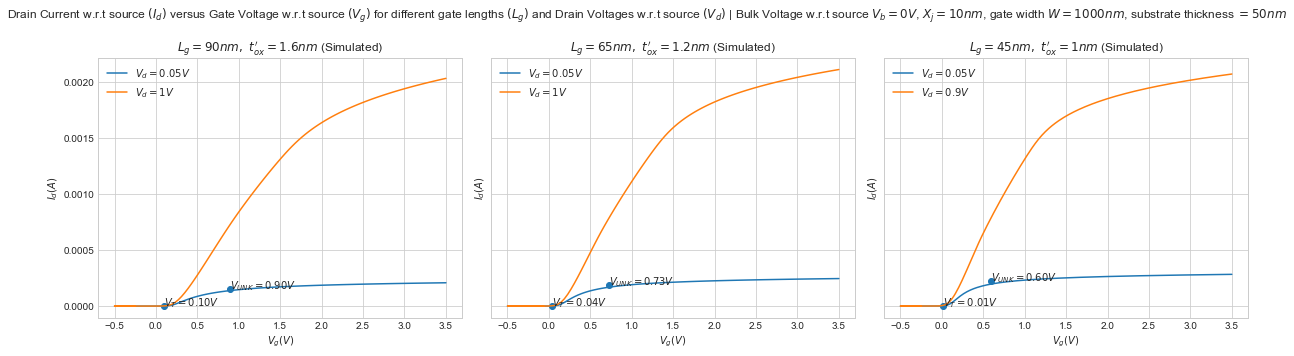

In [9]:
#Plotting data
fig,axes = plt.subplots(nrows=1,ncols=3,tight_layout=True,sharex=True,sharey=True, figsize=(17, 5))
fig.suptitle('Drain Current w.r.t source $(I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltages w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')

plt.subplot(131)
plt.plot(NIdVg_90nm_t16_Vd005[0], NIdVg_90nm_t16_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_90nm_t16_Vd1[0], NIdVg_90nm_t16_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_90nm_t16_Vd005 = piecewise_regression.Fit(NIdVg_90nm_t16_Vd005[0].to_numpy(), NIdVg_90nm_t16_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_90nm_t16_Vd005 = pw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_90nm_t16_Vd005 = pw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_90nm_t16_Vd005+pw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_90nm_t16_Vd005,Id_VT_NIdVg_90nm_t16_Vd005,marker='o')
axes[0].annotate(f'$V_T = {VT_NIdVg_90nm_t16_Vd005:.2f}V$', (VT_NIdVg_90nm_t16_Vd005, Id_VT_NIdVg_90nm_t16_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_90nm_t16_Vd005 = pw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_90nm_t16_Vd005 = pw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_90nm_t16_Vd005-VT_NIdVg_90nm_t16_Vd005)+Id_VT_NIdVg_90nm_t16_Vd005
plt.scatter(Vunk_NIdVg_90nm_t16_Vd005,Idunk_VT_NIdVg_90nm_t16_Vd005,marker='o',c='#1f77b4')
axes[0].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_90nm_t16_Vd005:.2f}V$', (Vunk_NIdVg_90nm_t16_Vd005, Idunk_VT_NIdVg_90nm_t16_Vd005))
axes[0].set_title('$L_g = 90nm,~t^{\prime}_{ox} = 1.6nm$ (Simulated)')
axes[0].set_xlabel('$V_g (V)$')
axes[0].set_ylabel('$I_d (A)$')
axes[0].legend(loc='best')

plt.subplot(132)
plt.plot(NIdVg_65nm_t12_Vd005[0], NIdVg_65nm_t12_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_65nm_t12_Vd1[0], NIdVg_65nm_t12_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_65nm_t12_Vd005 = piecewise_regression.Fit(NIdVg_65nm_t12_Vd005[0].to_numpy(), NIdVg_65nm_t12_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_65nm_t12_Vd005 = pw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_65nm_t12_Vd005 = pw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_65nm_t12_Vd005+pw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_65nm_t12_Vd005,Id_VT_NIdVg_65nm_t12_Vd005,marker='o')
axes[1].annotate(f'$V_T = {VT_NIdVg_65nm_t12_Vd005:.2f}V$', (VT_NIdVg_65nm_t12_Vd005, Id_VT_NIdVg_65nm_t12_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_65nm_t12_Vd005 = pw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_65nm_t12_Vd005 = pw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_65nm_t12_Vd005-VT_NIdVg_65nm_t12_Vd005)+Id_VT_NIdVg_65nm_t12_Vd005
plt.scatter(Vunk_NIdVg_65nm_t12_Vd005,Idunk_VT_NIdVg_65nm_t12_Vd005,marker='o',c='#1f77b4')
axes[1].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_65nm_t12_Vd005:.2f}V$', (Vunk_NIdVg_65nm_t12_Vd005, Idunk_VT_NIdVg_65nm_t12_Vd005))
axes[1].set_title('$L_g = 65nm,~t^{\prime}_{ox} = 1.2nm$ (Simulated)')
axes[1].set_xlabel('$V_g (V)$')
axes[1].set_ylabel('$I_d (A)$')
axes[1].legend(loc='best')

plt.subplot(133)
plt.plot(NIdVg_45nm_t1_Vd005[0], NIdVg_45nm_t1_Vd005[1], label='$V_d = 0.05V$')
plt.plot(NIdVg_45nm_t1_Vd09[0], NIdVg_45nm_t1_Vd09[1], label='$V_d = 0.9V$')
pw_fit_NIdVg_45nm_t1_Vd005 = piecewise_regression.Fit(NIdVg_45nm_t1_Vd005[0].to_numpy(), NIdVg_45nm_t1_Vd005[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_t1_Vd005 = pw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_t1_Vd005 = pw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_t1_Vd005+pw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_45nm_t1_Vd005,Id_VT_NIdVg_45nm_t1_Vd005,marker='o')
axes[2].annotate(f'$V_T = {VT_NIdVg_45nm_t1_Vd005:.2f}V$', (VT_NIdVg_45nm_t1_Vd005, Id_VT_NIdVg_45nm_t1_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
Vunk_NIdVg_45nm_t1_Vd005 = pw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_t1_Vd005 = pw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_t1_Vd005-VT_NIdVg_45nm_t1_Vd005)+Id_VT_NIdVg_45nm_t1_Vd005
plt.scatter(Vunk_NIdVg_45nm_t1_Vd005,Idunk_VT_NIdVg_45nm_t1_Vd005,marker='o',c='#1f77b4')
axes[2].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_45nm_t1_Vd005:.2f}V$', (Vunk_NIdVg_45nm_t1_Vd005, Idunk_VT_NIdVg_45nm_t1_Vd005))
axes[2].set_title('$L_g = 45nm,~t^{\prime}_{ox} = 1nm$ (Simulated)')
axes[2].set_xlabel('$V_g (V)$')
axes[2].set_ylabel('$I_d (A)$')
axes[2].legend(loc='best')

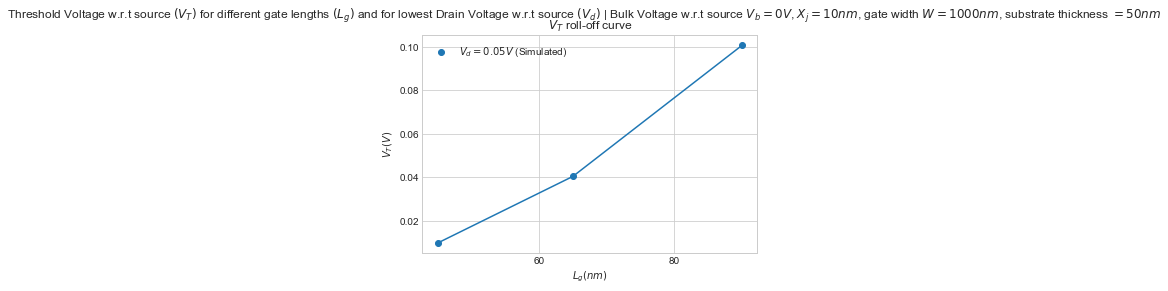

In [10]:
fig,axes = plt.subplots()
fig.suptitle('Threshold Voltage w.r.t source $(V_T)$ for different gate lengths $(L_g)$ and for lowest Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')
plt.scatter([45,65,90],[VT_NIdVg_45nm_t1_Vd005,VT_NIdVg_65nm_t12_Vd005,VT_NIdVg_90nm_t16_Vd005],marker='o',label='$V_d = 0.05V$ (Simulated)')
plt.plot([45,65,90],[VT_NIdVg_45nm_t1_Vd005,VT_NIdVg_65nm_t12_Vd005,VT_NIdVg_90nm_t16_Vd005])
axes.legend(loc='best')
axes.set_xlabel('$L_g (nm)$')
axes.set_ylabel('$V_T (V)$')
axes.set_title('$V_T$ roll-off curve')
axes.xaxis.set_major_locator(ticker.MultipleLocator(20))

Text(0, 0.5, '$\\log I_d (A)$')

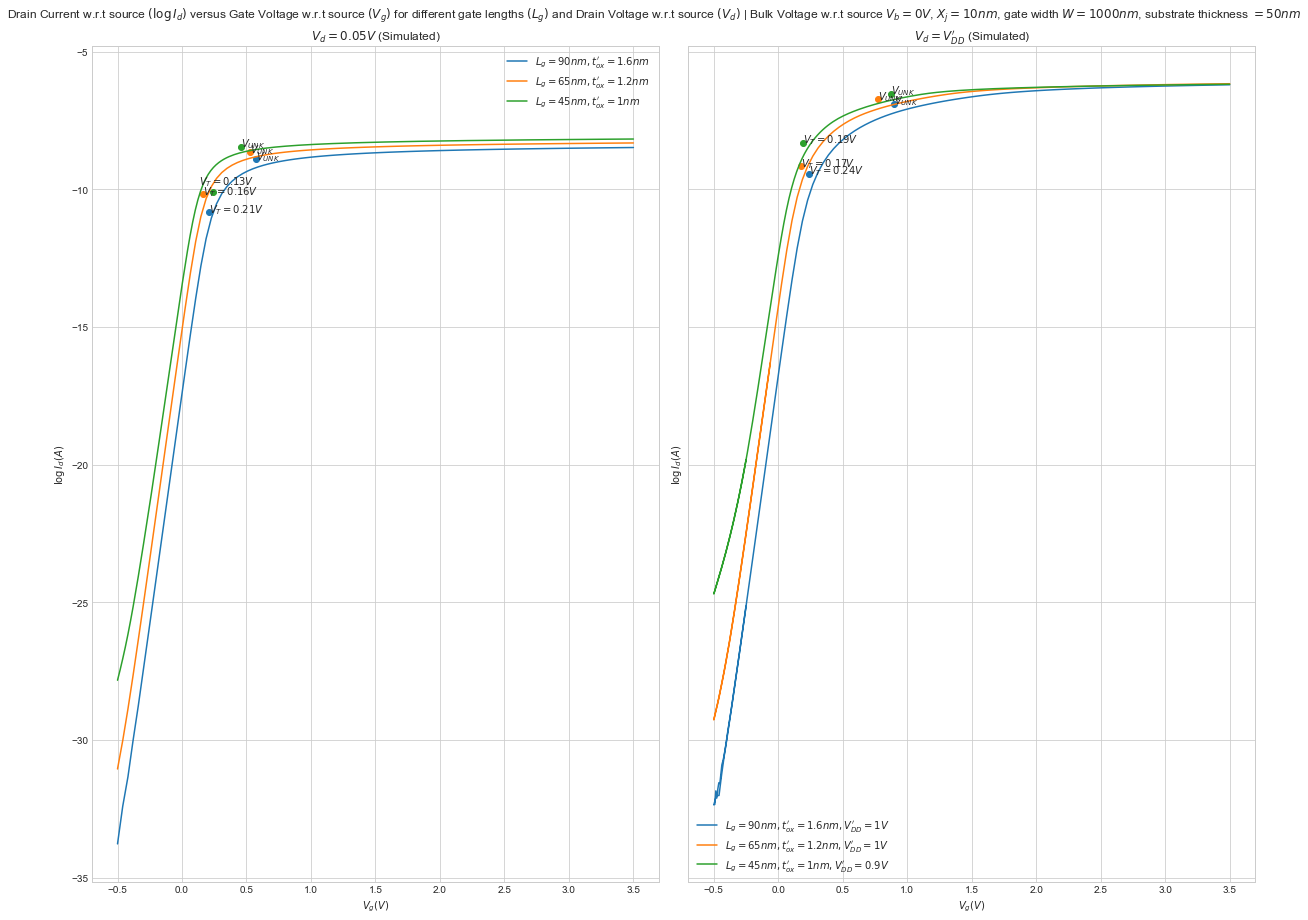

In [11]:
#Plotting data (logy vs x)
fig_SS, ax_SS = plt.subplots(nrows=1,ncols=2,tight_layout=True,sharex=True,sharey=True,figsize=(17, 13))
fig_SS.suptitle('Drain Current w.r.t source $(\log I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, $X_j = 10nm$, gate width $W = 1000nm$, substrate thickness $ = 50nm$')

plt.subplot(121)
plt.plot(NIdVg_90nm_t16_Vd005[0].to_numpy(), np.log(NIdVg_90nm_t16_Vd005[1].to_numpy()), label='$L_g = 90nm, t_{ox}^{\prime} = 1.6nm$')
logpw_fit_NIdVg_90nm_t16_Vd005 = piecewise_regression.Fit(NIdVg_90nm_t16_Vd005[0].to_numpy(),np.log(NIdVg_90nm_t16_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_90nm_t16_Vd005 = logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_90nm_t16_Vd005 = logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_90nm_t16_Vd005+logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_90nm_t16_Vd005,IdSS_VT_NIdVg_90nm_t16_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_90nm_t16_Vd005:.2f}V$', (VTSS_NIdVg_90nm_t16_Vd005, IdSS_VT_NIdVg_90nm_t16_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_90nm_t16_Vd005 = logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_90nm_t16_Vd005 = logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_90nm_t16_Vd005-VTSS_NIdVg_90nm_t16_Vd005)+IdSS_VT_NIdVg_90nm_t16_Vd005
plt.scatter(VSSunk_NIdVg_90nm_t16_Vd005,IdSSunk_VT_NIdVg_90nm_t16_Vd005,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_90nm_t16_Vd005, IdSSunk_VT_NIdVg_90nm_t16_Vd005))

plt.plot(NIdVg_65nm_t12_Vd005[0].to_numpy(), np.log(NIdVg_65nm_t12_Vd005[1].to_numpy()), label='$L_g = 65nm, t_{ox}^{\prime} = 1.2nm$')
logpw_fit_NIdVg_65nm_t12_Vd005 = piecewise_regression.Fit(NIdVg_65nm_t12_Vd005[0].to_numpy(),np.log(NIdVg_65nm_t12_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_65nm_t12_Vd005 = logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_65nm_t12_Vd005 = logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_65nm_t12_Vd005+logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_65nm_t12_Vd005,IdSS_VT_NIdVg_65nm_t12_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_65nm_t12_Vd005:.2f}V$', (VTSS_NIdVg_65nm_t12_Vd005, IdSS_VT_NIdVg_65nm_t12_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_65nm_t12_Vd005 = logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_65nm_t12_Vd005 = logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_65nm_t12_Vd005-VTSS_NIdVg_65nm_t12_Vd005)+IdSS_VT_NIdVg_65nm_t12_Vd005
plt.scatter(VSSunk_NIdVg_65nm_t12_Vd005,IdSSunk_VT_NIdVg_65nm_t12_Vd005,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_65nm_t12_Vd005, IdSSunk_VT_NIdVg_65nm_t12_Vd005))

plt.plot(NIdVg_45nm_t1_Vd005[0].to_numpy(), np.log(NIdVg_45nm_t1_Vd005[1].to_numpy()), label='$L_g = 45nm, t_{ox}^{\prime} = 1nm$')
logpw_fit_NIdVg_45nm_t1_Vd005 = piecewise_regression.Fit(NIdVg_45nm_t1_Vd005[0].to_numpy(),np.log(NIdVg_45nm_t1_Vd005[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_45nm_t1_Vd005 = logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_t1_Vd005 = logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_t1_Vd005+logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_Vd005,IdSS_VT_NIdVg_45nm_Vd005,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_t1_Vd005:.2f}V$', (VTSS_NIdVg_45nm_t1_Vd005, IdSS_VT_NIdVg_45nm_t1_Vd005))
#Beyond linear regime of I_d vs V_g for V_d = 0.05V
VSSunk_NIdVg_45nm_t1_Vd005 = logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_t1_Vd005 = logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_t1_Vd005-VTSS_NIdVg_45nm_t1_Vd005)+IdSS_VT_NIdVg_45nm_t1_Vd005
plt.scatter(VSSunk_NIdVg_45nm_t1_Vd005,IdSSunk_VT_NIdVg_45nm_t1_Vd005,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_t1_Vd005, IdSSunk_VT_NIdVg_45nm_t1_Vd005))

plt.legend(loc='best')
plt.title('$V_d = 0.05V$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(122)
plt.plot(NIdVg_90nm_t16_Vd1[0].to_numpy(), np.log(NIdVg_90nm_t16_Vd1[1].to_numpy()), label='$L_g = 90nm, t_{ox}^{\prime} = 1.6nm, V_{DD}^{\prime} = 1V$')
logpw_fit_NIdVg_90nm_t16_Vd1 = piecewise_regression.Fit(NIdVg_90nm_t16_Vd1[0].to_numpy(),np.log(NIdVg_90nm_t16_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_90nm_t16_Vd1 = logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_90nm_t16_Vd1 = logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_90nm_t16_Vd1+logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_90nm_t16_Vd1,IdSS_VT_NIdVg_90nm_t16_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_90nm_t16_Vd1:.2f}V$', (VTSS_NIdVg_90nm_t16_Vd1, IdSS_VT_NIdVg_90nm_t16_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_90nm_t16_Vd1 = logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_90nm_t16_Vd1 = logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_90nm_t16_Vd1-VTSS_NIdVg_90nm_t16_Vd1)+IdSS_VT_NIdVg_90nm_t16_Vd1
plt.scatter(VSSunk_NIdVg_90nm_t16_Vd1,IdSSunk_VT_NIdVg_90nm_t16_Vd1,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_90nm_t16_Vd1, IdSSunk_VT_NIdVg_90nm_t16_Vd1))

plt.plot(NIdVg_65nm_t12_Vd1[0].to_numpy(), np.log(NIdVg_65nm_t12_Vd1[1].to_numpy()), label='$L_g = 65nm, t_{ox}^{\prime} = 1.2nm, V_{DD}^{\prime} = 1V$')
logpw_fit_NIdVg_65nm_t12_Vd1 = piecewise_regression.Fit(NIdVg_65nm_t12_Vd1[0].to_numpy(),np.log(NIdVg_65nm_t12_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_65nm_t12_Vd1 = logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_65nm_t12_Vd1 = logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_65nm_t12_Vd1+logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_65nm_t12_Vd1,IdSS_VT_NIdVg_65nm_t12_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_65nm_t12_Vd1:.2f}V$', (VTSS_NIdVg_65nm_t12_Vd1, IdSS_VT_NIdVg_65nm_t12_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_65nm_t12_Vd1 = logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_65nm_t12_Vd1 = logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_65nm_t12_Vd1-VTSS_NIdVg_65nm_t12_Vd1)+IdSS_VT_NIdVg_65nm_t12_Vd1
plt.scatter(VSSunk_NIdVg_65nm_t12_Vd1,IdSSunk_VT_NIdVg_65nm_t12_Vd1,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_65nm_t12_Vd1, IdSSunk_VT_NIdVg_65nm_t12_Vd1))

plt.plot(NIdVg_45nm_t1_Vd09[0].to_numpy(), np.log(NIdVg_45nm_t1_Vd09[1].to_numpy()), label='$L_g = 45nm, t_{ox}^{\prime} = 1nm, V_{DD}^{\prime} = 0.9V$')
logpw_fit_NIdVg_45nm_t1_Vd09 = piecewise_regression.Fit(NIdVg_45nm_t1_Vd09[0].to_numpy(),np.log(NIdVg_45nm_t1_Vd09[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_45nm_t1_Vd09 = logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_t1_Vd09 = logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_t1_Vd09+logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_t1_Vd09,IdSS_VT_NIdVg_45nm_t1_Vd09,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_t1_Vd09:.2f}V$', (VTSS_NIdVg_45nm_t1_Vd09, IdSS_VT_NIdVg_45nm_t1_Vd09))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_45nm_t1_Vd09 = logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_t1_Vd09 = logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_t1_Vd09-VTSS_NIdVg_45nm_t1_Vd09)+IdSS_VT_NIdVg_45nm_t1_Vd09
plt.scatter(VSSunk_NIdVg_45nm_t1_Vd09,IdSSunk_VT_NIdVg_45nm_t1_Vd09,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_t1_Vd09, IdSSunk_VT_NIdVg_45nm_t1_Vd09))

plt.legend(loc='best')
plt.title('$V_d = V_{DD}^{\prime}$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

In [12]:
SS_NIdVg_90nm_t16_Vd005 = (1/(logpw_fit_NIdVg_90nm_t16_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000 #Sub-threshold Swing (SS) estimate
SS_NIdVg_65nm_t12_Vd005 = (1/(logpw_fit_NIdVg_65nm_t12_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_45nm_t1_Vd005 = (1/(logpw_fit_NIdVg_45nm_t1_Vd005.get_results()['estimates']['alpha1']['estimate']))*1000

pw_fit_NIdVg_90nm_t16_Vd1 = piecewise_regression.Fit(NIdVg_90nm_t16_Vd1[0].to_numpy(),NIdVg_90nm_t16_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_90nm_t16_Vd1 = pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_90nm_t16_Vd1 = pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_90nm_t16_Vd1+pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_90nm_t16_Vd1 = pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_90nm_t16_Vd1 = pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_90nm_t16_Vd1-VT_NIdVg_90nm_t16_Vd1)+Id_VT_NIdVg_90nm_t16_Vd1
Ion_NIdVg_90nm_t16_Vd1 = pw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_90nm_t16_Vd1)+Idunk_VT_NIdVg_90nm_t16_Vd1

pw_fit_NIdVg_65nm_t12_Vd1 = piecewise_regression.Fit(NIdVg_65nm_t12_Vd1[0].to_numpy(),NIdVg_65nm_t12_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_65nm_t12_Vd1 = pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_65nm_t12_Vd1 = pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_65nm_t12_Vd1+pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_65nm_t12_Vd1 = pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_65nm_t12_Vd1 = pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_65nm_t12_Vd1-VT_NIdVg_65nm_t12_Vd1)+Id_VT_NIdVg_65nm_t12_Vd1
Ion_NIdVg_65nm_t12_Vd1 = pw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_65nm_t12_Vd1)+Idunk_VT_NIdVg_65nm_t12_Vd1

pw_fit_NIdVg_45nm_t1_Vd09 = piecewise_regression.Fit(NIdVg_45nm_t1_Vd09[0].to_numpy(),NIdVg_45nm_t1_Vd09[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_t1_Vd09 = pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_t1_Vd09 = pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_t1_Vd09+pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_45nm_t1_Vd09 = pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_t1_Vd09 = pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_t1_Vd09-VT_NIdVg_45nm_t1_Vd09)+Id_VT_NIdVg_45nm_t1_Vd09
Ion_NIdVg_45nm_t1_Vd09 = pw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_45nm_t1_Vd09)+Idunk_VT_NIdVg_45nm_t1_Vd09

logIoff_NIdVg_90nm_t16_Vd1 = logpw_fit_NIdVg_90nm_t16_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_90nm_t16_Vd1 = math.pow(10,logIoff_NIdVg_90nm_t16_Vd1)
logIoff_NIdVg_65nm_t12_Vd1 = logpw_fit_NIdVg_65nm_t12_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_65nm_t12_Vd1 = math.pow(10,logIoff_NIdVg_65nm_t12_Vd1)
logIoff_NIdVg_45nm_t1_Vd09 = logpw_fit_NIdVg_45nm_t1_Vd09.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_45nm_t1_Vd09 = math.pow(10,logIoff_NIdVg_45nm_t1_Vd09)

DIBL_NIdVg_90nm_t16_Vd1 = ((VTSS_NIdVg_90nm_t16_Vd1-VTSS_NIdVg_90nm_t16_Vd005)/(1-0.05))*1000 #Drain-induced barrier lowering (DIBL) estimate
DIBL_NIdVg_65nm_t12_Vd1 = ((VTSS_NIdVg_65nm_t12_Vd1-VTSS_NIdVg_65nm_t12_Vd005)/(1-0.05))*1000
DIBL_NIdVg_45nm_t1_Vd09 = ((VTSS_NIdVg_45nm_t1_Vd09-VTSS_NIdVg_45nm_t1_Vd005)/(0.9-0.05))*1000

In [13]:
print("%.3e" % SS_NIdVg_90nm_t16_Vd005) #To print necessary variable values and enter in summary below

3.060e+01


### Summary <a class="anchor" id="section_2_1_1"></a>

| $$L_g~(nm)$$ | $$t_{ox}^{\prime}~(nm)$$ | $$V_{DD}^{\prime}~(V)$$ | $$V_T~(V)$$ $$@ V_d=0.05V$$ Simulated | $$SS~(mV/dec)$$ $$@ V_d=0.05V$$ Simulated | $$I_{ON}~(A)$$ $$@ V_d(V_g)=V_{DD}^{\prime}$$ Simulated | $$I_{OFF}~(A)$$ $$@ V_d=V_{DD}^{\prime}$$ Simulated | $$DIBL~(mV/V)$$ Simulated |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 90 | 1.6 | 1 | 0.206 | 30.604 | 1.373e-03 | 9.642e-18 | 33.813 |
| 65 | 1.2 | 1 | 0.160 | 31.106 | 1.569e-03 | 2.783e-15 | 16.082 |
| 45 | 1 | 0.9 | 0.133 | 33.741 | 1.626e-03 | 9.234e-14 | 70.566 |

1. $t_{ox}^{\prime}$ and $V_{DD}^{\prime}$ $\forall L_g$ were chosen from the ITRS roadmap presented in Table 3.3 of **[[2]](https://link.springer.com/book/10.1007/978-3-319-47597-4)** to keep inline with performance requirements of the respective technology nodes.
2. \# channel nodes, \# oxide nodes and \# bias steps were progressively increased accordingly for simulation of decreasing $L_g$, for better plot convergence.
2. $V_T$ extracted from $\log I_d$ vs $V_g$ plot has been reported in the table above because piecewise regression fit of $\log I_d$  vs $V_g$ plot better captures feautures which lie in the well modeled subthreshold and linear regions of MOSFET operation (as demonstrated in comparisons of experimental and simulated $V_T$ values in [Part IV](#section_4_1_1)).
3. $I_{ON}$ extracted from $I_d$ vs $V_g$ plot has been reported in the table above because $I_{ON} @ V_{g} = 1V$ lies beyond the linear region of MOSFET operation and is not well modeled through a $\log I_d$ vs $V_g$ regression fit (reason for it is explained below in point 4).
4. $V_{UNK}$ in $\log I_d$ (or $I_d$) vs $V_g$ plot indicates $V_g$ from which the MOSFET enters a non-linear operating region that needs 5 coupled equations (Poisson, Electron continuity, Hole continuity, Electron transport and Hole transport) to be modeled.
5. $DIBL$ $\forall L_g$ seem to be off because - 
    1. $\log I_d$ vs $V_g @ V_d=V_{DD}^{\prime}$ simulated plot has a slight curvature in the subthreshold region at very low $V_g$.
    2. Hence, $V_T @ V_d=1V$ is overestimated in the respective piecewise regression fit. 
6. The effect of scaling down $t_{ox}^{\prime}$ and $V_{DD}^{\prime}$ can be observed in higher $I_{OFF}$ (and hence higher $I_{ON}$) values when compared to respective values in [Part I](#section_1_1_1). This follows directly from a lowered $SS$ due to lower $t_{ox}^{\prime}$ ($SS\propto 1/C_{ox}^{\prime} \propto t_{ox}^{\prime}$ and hence [Eq. (2)](#eq2),[Eq. (3)](#eq3)).
7. Simulations in this section were carried out using the abacus tool at nanoHUB. It contains generic physical models for simulating various IV relations of MOSEFETs.

# Part III: Compact model comparison

## [Simulated] $I_d/V_g$ for N-MOSFET with constant oxide thickness $(t_{ox})$ <a class="anchor" id="section_3_1"></a>

In [14]:
NIdVg_45nm_Compact_Vd01 = pd.read_csv('Simulations/N-L45nm-IdVg-Compact.txt', skiprows=4,nrows=10,header=None)
NIdVg_45nm_Compact_Vd1 = pd.read_csv('Simulations/N-L45nm-IdVg-Compact.txt', skiprows=19,nrows=10,header=None)

NIdVg_32nm_Compact_Vd009 = pd.read_csv('Simulations/N-L32nm-IdVg-Compact.txt', skiprows=4,nrows=10,header=None)
NIdVg_32nm_Compact_Vd09 = pd.read_csv('Simulations/N-L32nm-IdVg-Compact.txt', skiprows=19,nrows=10,header=None)

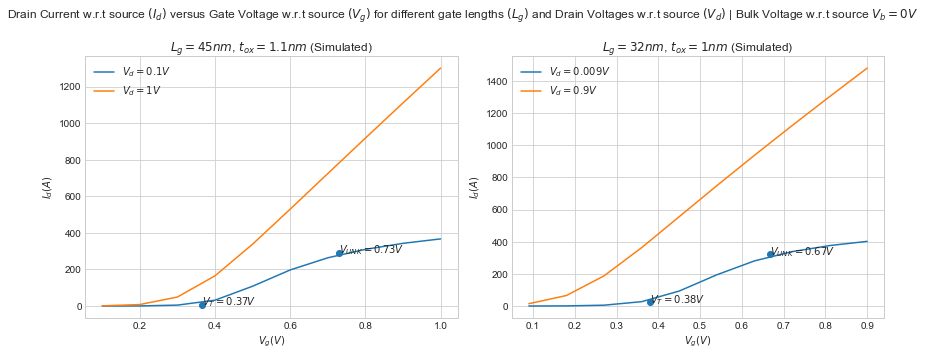

In [15]:
#Plotting data
fig,axes = plt.subplots(nrows=1,ncols=3,tight_layout=True,sharex=True,sharey=True, figsize=(12, 5))
fig.suptitle('Drain Current w.r.t source $(I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltages w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$')

plt.subplot(121)
plt.plot(NIdVg_45nm_Compact_Vd01[0], NIdVg_45nm_Compact_Vd01[1], label='$V_d = 0.1V$')
plt.plot(NIdVg_45nm_Compact_Vd1[0], NIdVg_45nm_Compact_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_45nm_Compact_Vd01 = piecewise_regression.Fit(NIdVg_45nm_Compact_Vd01[0].to_numpy(), NIdVg_45nm_Compact_Vd01[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_Compact_Vd01 = pw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_Compact_Vd01 = pw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_Compact_Vd01+pw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_45nm_Compact_Vd01,Id_VT_NIdVg_45nm_Compact_Vd01,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_45nm_Compact_Vd01:.2f}V$', (VT_NIdVg_45nm_Compact_Vd01, Id_VT_NIdVg_45nm_Compact_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_45nm_Compact_Vd01 = pw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_Compact_Vd01 = pw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_Compact_Vd01-VT_NIdVg_45nm_Compact_Vd01)+Id_VT_NIdVg_45nm_Compact_Vd01
plt.scatter(Vunk_NIdVg_45nm_Compact_Vd01,Idunk_VT_NIdVg_45nm_Compact_Vd01,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_45nm_Compact_Vd01:.2f}V$', (Vunk_NIdVg_45nm_Compact_Vd01, Idunk_VT_NIdVg_45nm_Compact_Vd01))
plt.title('$L_g = 45nm$, $t_{ox} = 1.1nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(NIdVg_32nm_Compact_Vd009[0], NIdVg_32nm_Compact_Vd009[1], label='$V_d = 0.009V$')
plt.plot(NIdVg_32nm_Compact_Vd09[0], NIdVg_32nm_Compact_Vd09[1], label='$V_d = 0.9V$')
pw_fit_NIdVg_32nm_Compact_Vd009 = piecewise_regression.Fit(NIdVg_32nm_Compact_Vd009[0].to_numpy(), NIdVg_32nm_Compact_Vd009[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_32nm_Compact_Vd009 = pw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_32nm_Compact_Vd009 = pw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_32nm_Compact_Vd009+pw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_32nm_Compact_Vd009,Id_VT_NIdVg_32nm_Compact_Vd009,marker='o')
plt.annotate(f'$V_T = {VT_NIdVg_32nm_Compact_Vd009:.2f}V$', (VT_NIdVg_32nm_Compact_Vd009, Id_VT_NIdVg_32nm_Compact_Vd009))
#Beyond linear regime of I_d vs V_g for V_d = 0.09V
Vunk_NIdVg_32nm_Compact_Vd009 = pw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_32nm_Compact_Vd009 = pw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_32nm_Compact_Vd009-VT_NIdVg_32nm_Compact_Vd009)+Id_VT_NIdVg_32nm_Compact_Vd009
plt.scatter(Vunk_NIdVg_32nm_Compact_Vd009,Idunk_VT_NIdVg_32nm_Compact_Vd009,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {Vunk_NIdVg_32nm_Compact_Vd009:.2f}V$', (Vunk_NIdVg_32nm_Compact_Vd009, Idunk_VT_NIdVg_32nm_Compact_Vd009))
plt.title('$L_g = 32nm$, $t_{ox} = 1nm$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$I_d (A)$')
plt.legend(loc='best')

Text(0, 0.5, '$\\log I_d (A)$')

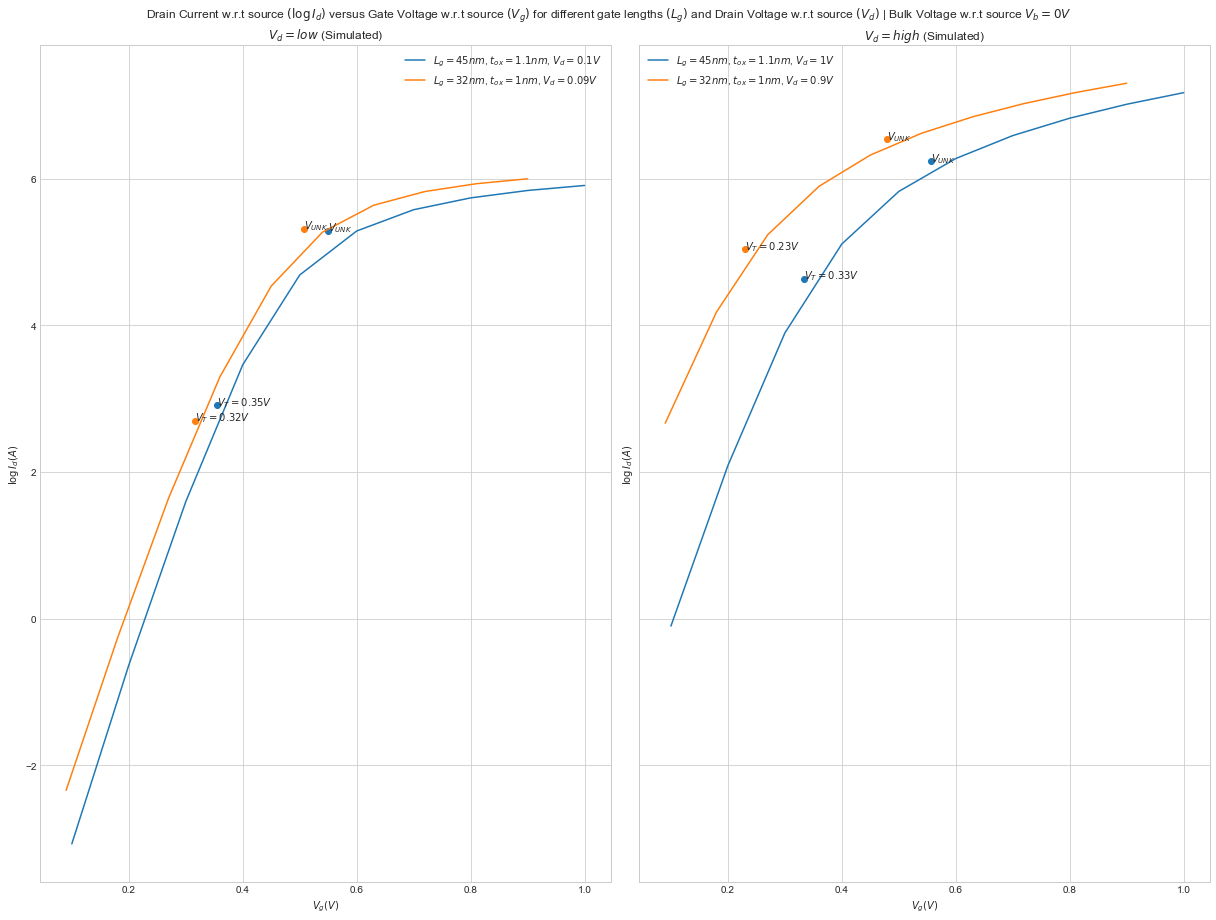

In [16]:
#Plotting data (logy vs x)
fig_SS, ax_SS = plt.subplots(nrows=1,ncols=2,tight_layout=True,sharex=True,sharey=True,figsize=(17, 13))
fig_SS.suptitle('Drain Current w.r.t source $(\log I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$')

plt.subplot(121)
plt.plot(NIdVg_45nm_Compact_Vd01[0].to_numpy(), np.log(NIdVg_45nm_Compact_Vd01[1].to_numpy()), label='$L_g = 45nm$, $t_{ox} = 1.1nm$, $V_d=0.1V$')
logpw_fit_NIdVg_45nm_Compact_Vd01 = piecewise_regression.Fit(NIdVg_45nm_Compact_Vd01[0].to_numpy(),np.log(NIdVg_45nm_Compact_Vd01[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_45nm_Compact_Vd01 = logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_Compact_Vd01 = logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_Compact_Vd01+logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_Compact_Vd01,IdSS_VT_NIdVg_45nm_Compact_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_Compact_Vd01:.2f}V$', (VTSS_NIdVg_45nm_Compact_Vd01, IdSS_VT_NIdVg_45nm_Compact_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_45nm_Compact_Vd01 = logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_Compact_Vd01 = logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_Compact_Vd01-VTSS_NIdVg_45nm_Compact_Vd01)+IdSS_VT_NIdVg_45nm_Compact_Vd01
plt.scatter(VSSunk_NIdVg_45nm_Compact_Vd01,IdSSunk_VT_NIdVg_45nm_Compact_Vd01,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_Compact_Vd01, IdSSunk_VT_NIdVg_45nm_Compact_Vd01))

plt.plot(NIdVg_32nm_Compact_Vd009[0].to_numpy(), np.log(NIdVg_32nm_Compact_Vd009[1].to_numpy()), label='$L_g = 32nm$, $t_{ox} = 1nm$, $V_d=0.09V$')
logpw_fit_NIdVg_32nm_Compact_Vd009 = piecewise_regression.Fit(NIdVg_32nm_Compact_Vd009[0].to_numpy(),np.log(NIdVg_32nm_Compact_Vd009[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_32nm_Compact_Vd009 = logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_32nm_Compact_Vd009 = logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_32nm_Compact_Vd009+logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_32nm_Compact_Vd009,IdSS_VT_NIdVg_32nm_Compact_Vd009,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_32nm_Compact_Vd009:.2f}V$', (VTSS_NIdVg_32nm_Compact_Vd009, IdSS_VT_NIdVg_32nm_Compact_Vd009))
#Beyond linear regime of I_d vs V_g for V_d = 0.09V
VSSunk_NIdVg_32nm_Compact_Vd009 = logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_32nm_Compact_Vd009 = logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_32nm_Compact_Vd009-VTSS_NIdVg_32nm_Compact_Vd009)+IdSS_VT_NIdVg_32nm_Compact_Vd009
plt.scatter(VSSunk_NIdVg_32nm_Compact_Vd009,IdSSunk_VT_NIdVg_32nm_Compact_Vd009,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_32nm_Compact_Vd009, IdSSunk_VT_NIdVg_32nm_Compact_Vd009))

plt.legend(loc='best')
plt.title('$V_d = low$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(122)
plt.plot(NIdVg_45nm_Compact_Vd1[0].to_numpy(), np.log(NIdVg_45nm_Compact_Vd1[1].to_numpy()), label='$L_g = 45nm$, $t_{ox} = 1.1nm$, $V_d=1V$')
logpw_fit_NIdVg_45nm_Compact_Vd1 = piecewise_regression.Fit(NIdVg_45nm_Compact_Vd1[0].to_numpy(),np.log(NIdVg_45nm_Compact_Vd1[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_45nm_Compact_Vd1 = logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_45nm_Compact_Vd1 = logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_45nm_Compact_Vd1+logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_45nm_Compact_Vd1,IdSS_VT_NIdVg_45nm_Compact_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_45nm_Compact_Vd1:.2f}V$', (VTSS_NIdVg_45nm_Compact_Vd1, IdSS_VT_NIdVg_45nm_Compact_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_45nm_Compact_Vd1 = logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_45nm_Compact_Vd1 = logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_45nm_Compact_Vd1-VTSS_NIdVg_45nm_Compact_Vd1)+IdSS_VT_NIdVg_45nm_Compact_Vd1
plt.scatter(VSSunk_NIdVg_45nm_Compact_Vd1,IdSSunk_VT_NIdVg_45nm_Compact_Vd1,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_45nm_Compact_Vd1, IdSSunk_VT_NIdVg_45nm_Compact_Vd1))

plt.plot(NIdVg_32nm_Compact_Vd09[0].to_numpy(), np.log(NIdVg_32nm_Compact_Vd09[1].to_numpy()), label='$L_g = 32nm$, $t_{ox} = 1nm$, $V_d=0.9V$')
logpw_fit_NIdVg_32nm_Compact_Vd09 = piecewise_regression.Fit(NIdVg_32nm_Compact_Vd09[0].to_numpy(),np.log(NIdVg_32nm_Compact_Vd09[1].to_numpy()), n_breakpoints=2)
VTSS_NIdVg_32nm_Compact_Vd09 = logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_32nm_Compact_Vd09 = logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_32nm_Compact_Vd09+logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_32nm_Compact_Vd09,IdSS_VT_NIdVg_32nm_Compact_Vd09,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_32nm_Compact_Vd09:.2f}V$', (VTSS_NIdVg_32nm_Compact_Vd09, IdSS_VT_NIdVg_32nm_Compact_Vd09))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_32nm_Compact_Vd09 = logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_32nm_Compact_Vd09 = logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_32nm_Compact_Vd09-VTSS_NIdVg_32nm_Compact_Vd09)+IdSS_VT_NIdVg_32nm_Compact_Vd09
plt.scatter(VSSunk_NIdVg_32nm_Compact_Vd09,IdSSunk_VT_NIdVg_32nm_Compact_Vd09,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}}$', (VSSunk_NIdVg_32nm_Compact_Vd09, IdSSunk_VT_NIdVg_32nm_Compact_Vd09))

plt.legend(loc='best')
plt.title('$V_d = high$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

Text(0.5, 1.0, '$V_T$ roll-off curve')

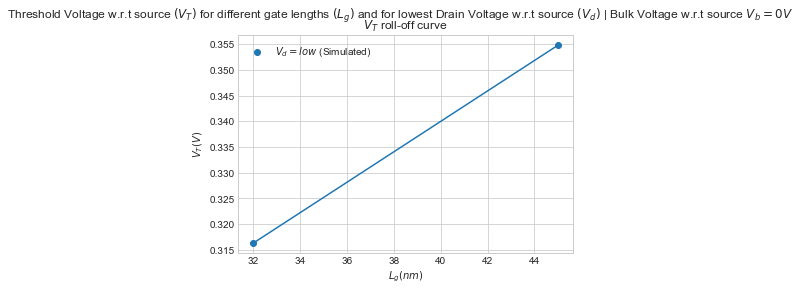

In [17]:
fig,axes = plt.subplots()
fig.suptitle('Threshold Voltage w.r.t source $(V_T)$ for different gate lengths $(L_g)$ and for lowest Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$')
plt.scatter([32,45],[VTSS_NIdVg_32nm_Compact_Vd009,VTSS_NIdVg_45nm_Compact_Vd01],marker='o',label='$V_d = low$ (Simulated)')
plt.plot([32,45],[VTSS_NIdVg_32nm_Compact_Vd009,VTSS_NIdVg_45nm_Compact_Vd01])
axes.legend(loc='best')
axes.set_xlabel('$L_g (nm)$')
axes.set_ylabel('$V_T (V)$')
axes.set_title('$V_T$ roll-off curve')

In [18]:
SS_NIdVg_45nm_Compact_Vd01 = (1/(logpw_fit_NIdVg_45nm_Compact_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000 #Sub-threshold Swing (SS) estimate
SS_NIdVg_32nm_Compact_Vd009 = (1/(logpw_fit_NIdVg_32nm_Compact_Vd009.get_results()['estimates']['alpha1']['estimate']))*1000

pw_fit_NIdVg_45nm_Compact_Vd1 = piecewise_regression.Fit(NIdVg_45nm_Compact_Vd1[0].to_numpy(),NIdVg_45nm_Compact_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_45nm_Compact_Vd1 = pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_45nm_Compact_Vd1 = pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_45nm_Compact_Vd1+pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_45nm_Compact_Vd1 = pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_45nm_Compact_Vd1 = pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_45nm_Compact_Vd1-VT_NIdVg_45nm_Compact_Vd1)+Id_VT_NIdVg_45nm_Compact_Vd1
Ion_NIdVg_45nm_Compact_Vd1 = pw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_45nm_Compact_Vd1)+Idunk_VT_NIdVg_45nm_Compact_Vd1

pw_fit_NIdVg_32nm_Compact_Vd09 = piecewise_regression.Fit(NIdVg_32nm_Compact_Vd09[0].to_numpy(),NIdVg_32nm_Compact_Vd09[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_32nm_Compact_Vd09 = pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_32nm_Compact_Vd09 = pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_32nm_Compact_Vd09+pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_32nm_Compact_Vd09 = pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_32nm_Compact_Vd09 = pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_32nm_Compact_Vd09-VT_NIdVg_32nm_Compact_Vd09)+Id_VT_NIdVg_32nm_Compact_Vd09
Ion_NIdVg_32nm_Compact_Vd09 = pw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_32nm_Compact_Vd09)+Idunk_VT_NIdVg_32nm_Compact_Vd09

logIoff_NIdVg_45nm_Compact_Vd1 = logpw_fit_NIdVg_45nm_Compact_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_45nm_Compact_Vd1 = math.pow(10,logIoff_NIdVg_45nm_Compact_Vd1)
logIoff_NIdVg_32nm_Compact_Vd09 = logpw_fit_NIdVg_32nm_Compact_Vd09.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_32nm_Compact_Vd09 = math.pow(10,logIoff_NIdVg_32nm_Compact_Vd09)

DIBL_NIdVg_45nm_Compact = ((VTSS_NIdVg_45nm_Compact_Vd1-VTSS_NIdVg_45nm_Compact_Vd01)/(1-0.1))*1000 #Drain-induced barrier lowering (DIBL) estimate
DIBL_NIdVg_32nm_Compact = ((VTSS_NIdVg_32nm_Compact_Vd09-VTSS_NIdVg_32nm_Compact_Vd009)/(0.9-0.09))*1000

In [19]:
print("%.3e" % SS_NIdVg_45nm_Compact_Vd01) #To print necessary variable values and enter in summary below

4.286e+01


### Summary <a class="anchor" id="section_3_1_1"></a>

| $$L_g~(nm)$$ | $$V_T~(V)$$ $$@ V_d=low$$ Simulated | $$SS~(mV/dec)$$ $$@ V_d=low$$ Simulated | $$I_{ON}~(A)$$ $$@ V_d(V_g)=high$$ Simulated | $$I_{OFF}~(A)$$ $$@ V_d=high$$ Simulated | $$DIBL~(mV/V)$$ Simulated |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 45 | 0.355 | 42.864 | 1302.682 | 9.178e-03 | -23.280 |
| 32 | 0.316 | 45.152 | 1679.011 | 14.043 | -105.559 |

1. $V_T$ extracted from $\log I_d$ vs $V_g$ plot has been reported in the table above because piecewise regression fit of $\log I_d$  vs $V_g$ plot better captures feautures which lie in the well modeled subthreshold and linear regions of MOSFET operation (as demonstrated in comparisons of experimental and simulated $V_T$ values in [Part IV](#section_4_1_1)).
2. $V_T$ extracted from $\log I_d$ vs $V_g$ plot has been used to plot $V_T$ roll-off curve this time, because piecewise regression fit of $I_d$ vs $V_g$ plot isn't accurate with very few data points (10 in this case). 
3. $I_{ON}$ extracted from $I_d$ vs $V_g$ plot has been reported in the table above because $I_{ON} @ V_{g} = 1V$ lies beyond the linear region of MOSFET operation and is not well modeled through a $\log I_d$ vs $V_g$ regression fit (reason for it is explained below in point 4).
4. $V_{UNK}$ in $\log I_d$ (or $I_d$) vs $V_g$ plot indicates $V_g$ from which the MOSFET enters a non-linear operating region that needs 5 coupled equations (Poisson, Electron continuity, Hole continuity, Electron transport and Hole transport) to be modeled.
5. $DIBL$ $\forall L_g$ has been captured well this time due to the perfect linearity at very low $V_g$ in the subthreshold region of $\log I_d$ vs $V_g @ V_d = high$ simulated plot. 
6. Simulations in this section were carried out using compact models present in the nano-CMOS tool at nanoHUB. In addition to generic IV models of MOSEFETs, compact models include - capacitance models, gate dielectric leakage current models, source-drain junction diode models and Noise / high-frequency models. Hence, compact models can simulate lower $L_g$ more accurately than a generic MOSFET IV simulator (as can be observed from respective values in table above w.r.t those in [Part I](#section_1_1_1)).

# Part IV: Comparison with measured data for N SOI MOSFETs

## [Measured vs Simulated] $I_d/V_g$ for NMOS SOI MOSFET with constant oxide thickness $(t_{ox})$ <a class="anchor" id="section_4_1"></a>

In [20]:
#Reading Measured data
NIdVg_06um = pd.read_excel('B774W4/N-L0.6um-IdVg.xls', sheet_name='Data')
NIdVg_1um = pd.read_excel('B774W4/N-L1um-IdVg.xls', sheet_name='Data')
NIdVg_6um = pd.read_excel('B774W4/N-L6um-IdVg.xls', sheet_name='Data')

NIdVg_06um_Vd01 = NIdVg_06um[['GateV(1)','DrainI(1)']]
NIdVg_06um_Vd1 = NIdVg_06um[['GateV(2)','DrainI(2)']]

NIdVg_1um_Vd01 = NIdVg_1um[['GateV(1)','DrainI(1)']]
NIdVg_1um_Vd1 = NIdVg_1um[['GateV(2)','DrainI(2)']]

NIdVg_6um_Vd01 = NIdVg_6um[['GateV(1)','DrainI(1)']]
NIdVg_6um_Vd1 = NIdVg_6um[['GateV(2)','DrainI(2)']]

#Reading Simulated data
NIdVg_06um_Sim_Vd01 = pd.read_csv('Simulations/N-L06um-IdVg-Sim.txt', skiprows=4,nrows=71,header=None)
NIdVg_06um_Sim_Vd1 = pd.read_csv('Simulations/N-L06um-IdVg-Sim.txt', skiprows=80,nrows=71,header=None)

NIdVg_1um_Sim_Vd01 = pd.read_csv('Simulations/N-L1um-IdVg-Sim.txt', skiprows=4,nrows=71,header=None)
NIdVg_1um_Sim_Vd1 = pd.read_csv('Simulations/N-L1um-IdVg-Sim.txt', skiprows=80,nrows=71,header=None)

NIdVg_6um_Sim_Vd01 = pd.read_csv('Simulations/N-L6um-IdVg-Sim.txt', skiprows=4,nrows=71,header=None)
NIdVg_6um_Sim_Vd1 = pd.read_csv('Simulations/N-L6um-IdVg-Sim.txt', skiprows=80,nrows=71,header=None)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Text(0, 0.5, '$I_d (A)$')

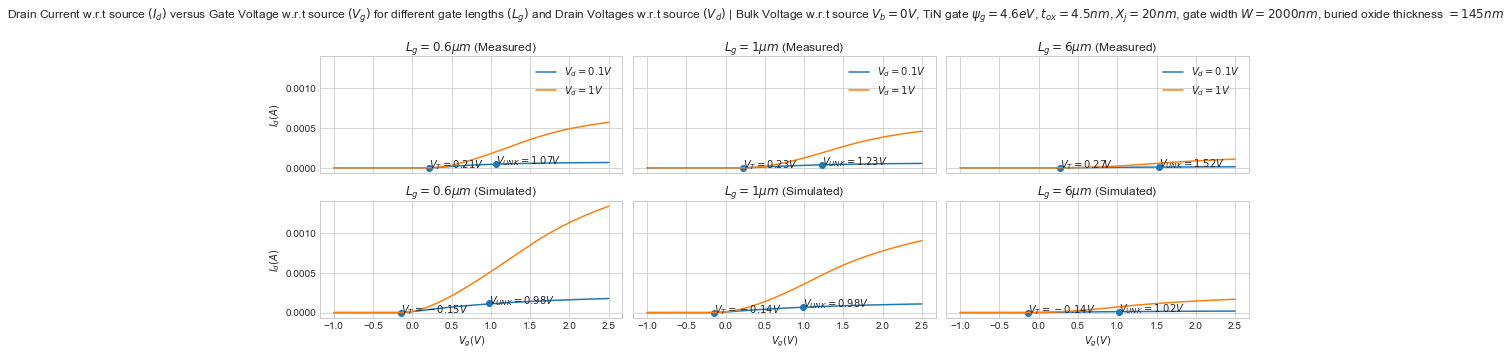

In [21]:
#Plotting data
fig,axes = plt.subplots(nrows=2,ncols=3,tight_layout=True,sharex=True,sharey=True, figsize=(14, 5))
fig.suptitle('Drain Current w.r.t source $(I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltages w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, TiN gate $\psi_g = 4.6eV$, $t_{ox} = 4.5nm$, $X_j = 20nm$, gate width $W = 2000nm$, buried oxide thickness $ = 145nm$')

plt.subplot(231)
NIdVg_06um_Vd01.plot(x = 'GateV(1)', y = 'DrainI(1)', ax=axes[0,0], label='$V_d = 0.1V$')
NIdVg_06um_Vd1.plot(x='GateV(2)', y='DrainI(2)', ax=axes[0,0], label='$V_d = 1V$')
pw_fit_NIdVg_06um_Vd01 = piecewise_regression.Fit(NIdVg_06um_Vd01['GateV(1)'].to_numpy(),NIdVg_06um_Vd01['DrainI(1)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_06um_Vd01 = pw_fit_NIdVg_06um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_06um_Vd01 = pw_fit_NIdVg_06um_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_06um_Vd01+pw_fit_NIdVg_06um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_06um_Vd01,Id_VT_NIdVg_06um_Vd01,marker='o')
axes[0,0].annotate(f'$V_T = {VT_NIdVg_06um_Vd01:.2f}V$', (VT_NIdVg_06um_Vd01, Id_VT_NIdVg_06um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_06um_Vd01 = pw_fit_NIdVg_06um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_06um_Vd01 = pw_fit_NIdVg_06um_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_06um_Vd01-VT_NIdVg_06um_Vd01)+Id_VT_NIdVg_06um_Vd01
plt.scatter(Vunk_NIdVg_06um_Vd01,Idunk_VT_NIdVg_06um_Vd01,marker='o', label='$V_ov$',c='#1f77b4')
axes[0,0].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_06um_Vd01:.2f}V$', (Vunk_NIdVg_06um_Vd01, Idunk_VT_NIdVg_06um_Vd01))
axes[0,0].set_title('$L_g = 0.6\mu m$ (Measured)')
axes[0,0].set_xlabel('$V_g (V)$')
axes[0,0].set_ylabel('$I_d (A)$')

plt.subplot(232)
NIdVg_1um_Vd01.plot(x = 'GateV(1)', y = 'DrainI(1)', ax=axes[0,1], label='$V_d = 0.1V$')
NIdVg_1um_Vd1.plot(x='GateV(2)', y='DrainI(2)', ax=axes[0,1], label='$V_d = 1V$')
pw_fit_NIdVg_1um_Vd01 = piecewise_regression.Fit(NIdVg_1um_Vd01['GateV(1)'].to_numpy(),NIdVg_1um_Vd01['DrainI(1)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_1um_Vd01 = pw_fit_NIdVg_1um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_1um_Vd01 = pw_fit_NIdVg_1um_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_1um_Vd01+pw_fit_NIdVg_1um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_1um_Vd01,Id_VT_NIdVg_1um_Vd01,marker="o")
axes[0,1].annotate(f'$V_T = {VT_NIdVg_1um_Vd01:.2f}V$', (VT_NIdVg_1um_Vd01, Id_VT_NIdVg_1um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_1um_Vd01 = pw_fit_NIdVg_1um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_1um_Vd01 = pw_fit_NIdVg_1um_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_1um_Vd01-VT_NIdVg_1um_Vd01)+Id_VT_NIdVg_1um_Vd01
plt.scatter(Vunk_NIdVg_1um_Vd01,Idunk_VT_NIdVg_1um_Vd01,c='#1f77b4',marker='o')
axes[0,1].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_1um_Vd01:.2f}V$', (Vunk_NIdVg_1um_Vd01, Idunk_VT_NIdVg_1um_Vd01))
axes[0,1].set_title('$L_g = 1\mu m$ (Measured)')
axes[0,1].set_xlabel('$V_g (V)$')
axes[0,1].set_ylabel('$I_d (A)$')

plt.subplot(233)
NIdVg_6um_Vd01.plot(x='GateV(1)', y='DrainI(1)', ax=axes[0,2], label='$V_d = 0.1V$')
NIdVg_6um_Vd1.plot(x='GateV(2)', y='DrainI(2)', ax=axes[0,2], label='$V_d = 1V$')
pw_fit_NIdVg_6um_Vd01 = piecewise_regression.Fit(NIdVg_6um_Vd01['GateV(1)'].to_numpy(),NIdVg_6um_Vd01['DrainI(1)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_6um_Vd01 = pw_fit_NIdVg_6um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_6um_Vd01 = pw_fit_NIdVg_6um_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_6um_Vd01+pw_fit_NIdVg_6um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_6um_Vd01,Id_VT_NIdVg_6um_Vd01,marker="o")
axes[0,2].annotate(f'$V_T = {VT_NIdVg_6um_Vd01:.2f}V$', (VT_NIdVg_6um_Vd01, Id_VT_NIdVg_6um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_6um_Vd01 = pw_fit_NIdVg_6um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_6um_Vd01 = pw_fit_NIdVg_6um_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_6um_Vd01-VT_NIdVg_6um_Vd01)+Id_VT_NIdVg_6um_Vd01
plt.scatter(Vunk_NIdVg_6um_Vd01,Idunk_VT_NIdVg_6um_Vd01,c='#1f77b4',marker='o')
axes[0,2].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_6um_Vd01:.2f}V$', (Vunk_NIdVg_6um_Vd01, Idunk_VT_NIdVg_6um_Vd01))
axes[0,2].set_title('$L_g = 6\mu m$ (Measured)')
axes[0,2].set_xlabel('$V_g (V)$')
axes[0,2].set_ylabel('$I_d (A)$')

plt.subplot(234)
plt.plot(NIdVg_06um_Sim_Vd01[0], NIdVg_06um_Sim_Vd01[1], label='$V_d = 0.1V$')
plt.plot(NIdVg_06um_Sim_Vd1[0], NIdVg_06um_Sim_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_06um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_06um_Sim_Vd01[0].to_numpy(),NIdVg_06um_Sim_Vd01[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_06um_Sim_Vd01 = pw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_06um_Sim_Vd01 = pw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_06um_Sim_Vd01+pw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_06um_Sim_Vd01,Id_VT_NIdVg_06um_Sim_Vd01,marker='o')
axes[1,0].annotate(f'$V_T = {VT_NIdVg_06um_Sim_Vd01:.2f}V$', (VT_NIdVg_06um_Sim_Vd01, Id_VT_NIdVg_06um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_06um_Sim_Vd01 = pw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_06um_Sim_Vd01 = pw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_06um_Sim_Vd01-VT_NIdVg_06um_Sim_Vd01)+Id_VT_NIdVg_06um_Sim_Vd01
plt.scatter(Vunk_NIdVg_06um_Sim_Vd01,Idunk_VT_NIdVg_06um_Sim_Vd01,marker='o', label='$V_ov$',c='#1f77b4')
axes[1,0].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_06um_Sim_Vd01:.2f}V$', (Vunk_NIdVg_06um_Sim_Vd01, Idunk_VT_NIdVg_06um_Sim_Vd01))
axes[1,0].set_title('$L_g = 0.6\mu m$ (Simulated)')
axes[1,0].set_xlabel('$V_g (V)$')
axes[1,0].set_ylabel('$I_d (A)$')

plt.subplot(235)
plt.plot(NIdVg_1um_Sim_Vd01[0], NIdVg_1um_Sim_Vd01[1], label='$V_d = 0.1V$')
plt.plot(NIdVg_1um_Sim_Vd1[0], NIdVg_1um_Sim_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_1um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_1um_Sim_Vd01[0].to_numpy(),NIdVg_1um_Sim_Vd01[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_1um_Sim_Vd01 = pw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_1um_Sim_Vd01 = pw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_1um_Sim_Vd01+pw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_1um_Sim_Vd01,Id_VT_NIdVg_1um_Sim_Vd01,marker="o")
axes[1,1].annotate(f'$V_T = {VT_NIdVg_1um_Sim_Vd01:.2f}V$', (VT_NIdVg_1um_Sim_Vd01, Id_VT_NIdVg_1um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_1um_Sim_Vd01 = pw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_1um_Sim_Vd01 = pw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_1um_Sim_Vd01-VT_NIdVg_1um_Sim_Vd01)+Id_VT_NIdVg_1um_Sim_Vd01
plt.scatter(Vunk_NIdVg_1um_Sim_Vd01,Idunk_VT_NIdVg_1um_Sim_Vd01,c='#1f77b4',marker='o')
axes[1,1].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_1um_Sim_Vd01:.2f}V$', (Vunk_NIdVg_1um_Sim_Vd01, Idunk_VT_NIdVg_1um_Sim_Vd01))
axes[1,1].set_title('$L_g = 1\mu m$ (Simulated)')
axes[1,1].set_xlabel('$V_g (V)$')
axes[1,1].set_ylabel('$I_d (A)$')

plt.subplot(236)
plt.plot(NIdVg_6um_Sim_Vd01[0], NIdVg_6um_Sim_Vd01[1], label='$V_d = 0.1V$')
plt.plot(NIdVg_6um_Sim_Vd1[0], NIdVg_6um_Sim_Vd1[1], label='$V_d = 1V$')
pw_fit_NIdVg_6um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_6um_Sim_Vd01[0].to_numpy(),NIdVg_6um_Sim_Vd01[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_6um_Sim_Vd01 = pw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_6um_Sim_Vd01 = pw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_6um_Sim_Vd01+pw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VT_NIdVg_6um_Sim_Vd01,Id_VT_NIdVg_6um_Sim_Vd01,marker="o")
axes[1,2].annotate(f'$V_T = {VT_NIdVg_6um_Sim_Vd01:.2f}V$', (VT_NIdVg_6um_Sim_Vd01, Id_VT_NIdVg_6um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
Vunk_NIdVg_6um_Sim_Vd01 = pw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_6um_Sim_Vd01 = pw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_6um_Sim_Vd01-VT_NIdVg_6um_Sim_Vd01)+Id_VT_NIdVg_6um_Sim_Vd01
plt.scatter(Vunk_NIdVg_6um_Sim_Vd01,Idunk_VT_NIdVg_6um_Sim_Vd01,c='#1f77b4',marker='o')
axes[1,2].annotate(f'$V_{{UNK}} = {Vunk_NIdVg_6um_Sim_Vd01:.2f}V$', (Vunk_NIdVg_6um_Sim_Vd01, Idunk_VT_NIdVg_6um_Sim_Vd01))
axes[1,2].set_title('$L_g = 6\mu m$ (Simulated)')
axes[1,2].set_xlabel('$V_g (V)$')
axes[1,2].set_ylabel('$I_d (A)$')

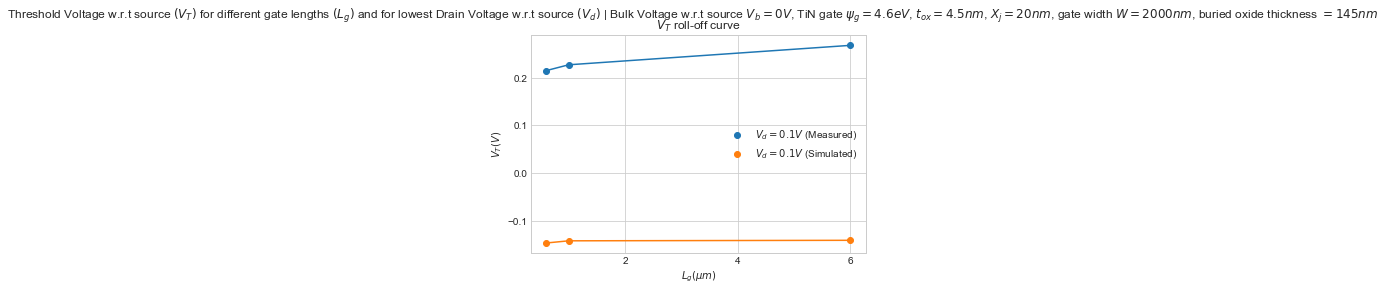

In [22]:
fig,axes = plt.subplots()
fig.suptitle('Threshold Voltage w.r.t source $(V_T)$ for different gate lengths $(L_g)$ and for lowest Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, TiN gate $\psi_g = 4.6eV$, $t_{ox} = 4.5nm$, $X_j = 20nm$, gate width $W = 2000nm$, buried oxide thickness $ = 145nm$')
plt.scatter([0.6,1,6],[VT_NIdVg_06um_Vd01,VT_NIdVg_1um_Vd01,VT_NIdVg_6um_Vd01],marker='o',label='$V_d = 0.1V$ (Measured)')
plt.plot([0.6,1,6],[VT_NIdVg_06um_Vd01,VT_NIdVg_1um_Vd01,VT_NIdVg_6um_Vd01])
plt.scatter([0.6,1,6],[VT_NIdVg_06um_Sim_Vd01,VT_NIdVg_1um_Sim_Vd01,VT_NIdVg_6um_Sim_Vd01],marker='o',label='$V_d = 0.1V$ (Simulated)')
plt.plot([0.6,1,6],[VT_NIdVg_06um_Sim_Vd01,VT_NIdVg_1um_Sim_Vd01,VT_NIdVg_6um_Sim_Vd01])
axes.legend(loc='best')
axes.set_xlabel('$L_g (\mu m)$')
axes.set_ylabel('$V_T (V)$')
axes.set_title('$V_T$ roll-off curve')
axes.xaxis.set_major_locator(ticker.MultipleLocator(2))

Text(0, 0.5, '$\\log I_d (A)$')

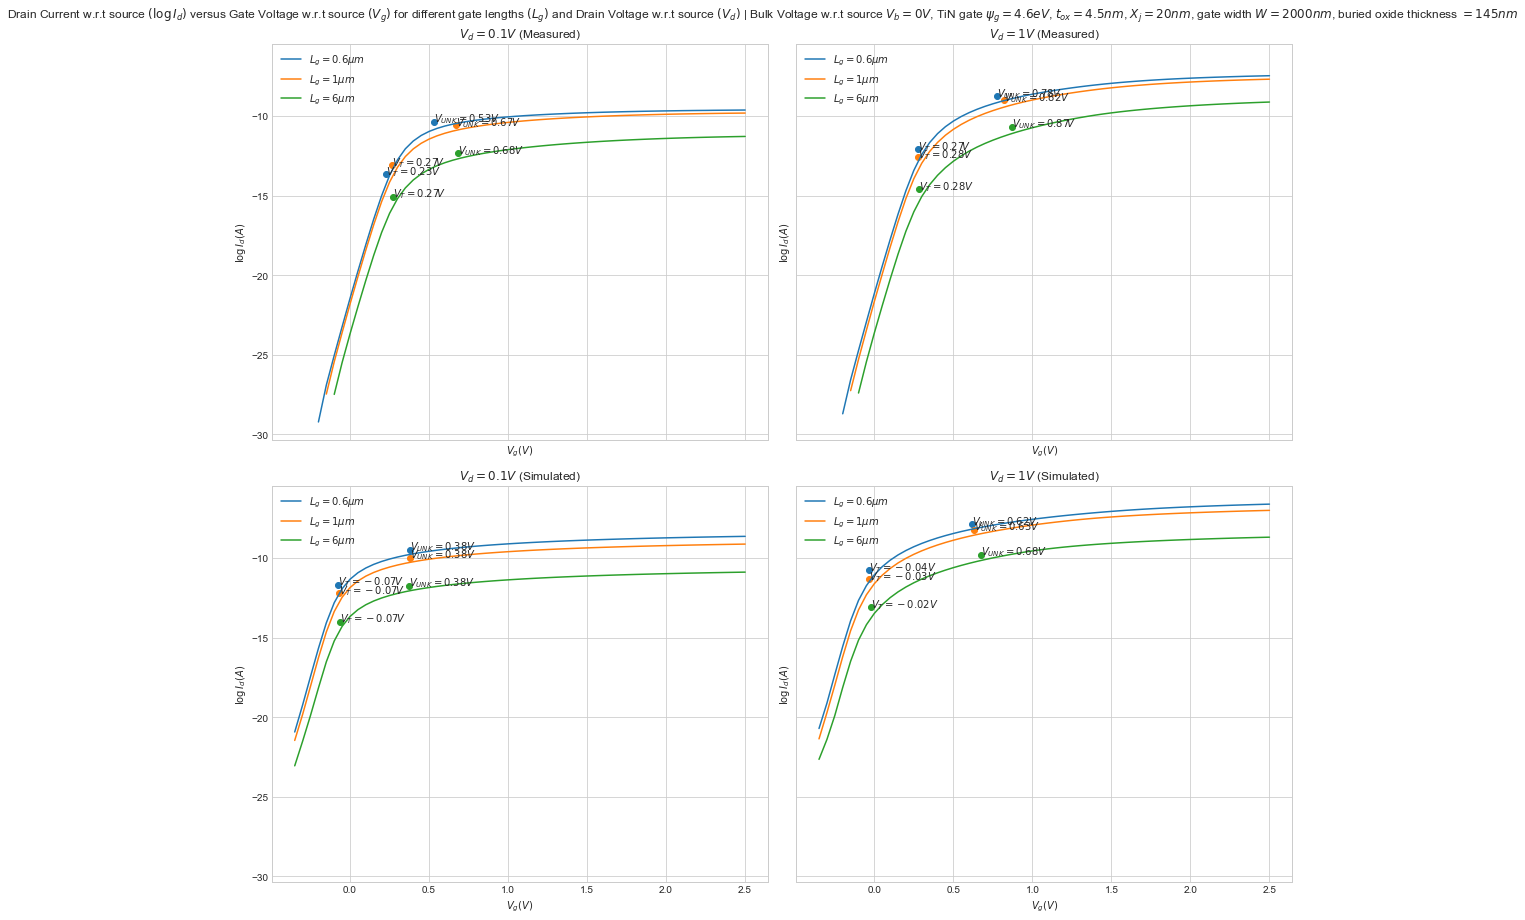

In [23]:
#Plotting data (logy vs x)
fig_SS, ax_SS = plt.subplots(nrows=2,ncols=2,tight_layout=True,sharex=True,sharey=True,figsize=(15, 13))
fig_SS.suptitle('Drain Current w.r.t source $(\log I_d)$ versus Gate Voltage w.r.t source $(V_g)$ for different gate lengths $(L_g)$ and Drain Voltage w.r.t source $(V_d)$ | Bulk Voltage w.r.t source $V_{b} = 0V$, TiN gate $\psi_g = 4.6eV$, $t_{ox} = 4.5nm$, $X_j = 20nm$, gate width $W = 2000nm$, buried oxide thickness $ = 145nm$')

plt.subplot(221)
#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_06um_Vd01['DrainI(1)'].to_numpy()))))
plt.plot(NIdVg_06um_Vd01['GateV(1)'].to_numpy()[16:], np.log(NIdVg_06um_Vd01['DrainI(1)'].to_numpy()[16:]), label='$L_g = 0.6\mu m$')
logpw_fit_NIdVg_06um_Vd01 = piecewise_regression.Fit(NIdVg_06um_Vd01['GateV(1)'].to_numpy()[16:],np.log(NIdVg_06um_Vd01['DrainI(1)'].to_numpy()[16:]), n_breakpoints=2)
VTSS_NIdVg_06um_Vd01 = logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_06um_Vd01 = logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_06um_Vd01+logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_06um_Vd01,IdSS_VT_NIdVg_06um_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_06um_Vd01:.2f}V$', (VTSS_NIdVg_06um_Vd01, IdSS_VT_NIdVg_06um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_06um_Vd01 = logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_06um_Vd01 = logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_06um_Vd01-VTSS_NIdVg_06um_Vd01)+IdSS_VT_NIdVg_06um_Vd01
plt.scatter(VSSunk_NIdVg_06um_Vd01,IdSSunk_VT_NIdVg_06um_Vd01,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_06um_Vd01:.2f}V$', (VSSunk_NIdVg_06um_Vd01, IdSSunk_VT_NIdVg_06um_Vd01))

#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_1um_Vd01['DrainI(1)'].to_numpy()))))
plt.plot(NIdVg_1um_Vd01['GateV(1)'].to_numpy()[17:], np.log(NIdVg_1um_Vd01['DrainI(1)'].to_numpy()[17:]), label='$L_g = 1\mu m$')
logpw_fit_NIdVg_1um_Vd01 = piecewise_regression.Fit(NIdVg_1um_Vd01['GateV(1)'].to_numpy()[17:],np.log(NIdVg_1um_Vd01['DrainI(1)'].to_numpy()[17:]), n_breakpoints=2)
VTSS_NIdVg_1um_Vd01 = logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_1um_Vd01 = logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_1um_Vd01+logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_1um_Vd01,IdSS_VT_NIdVg_1um_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_1um_Vd01:.2f}V$', (VTSS_NIdVg_1um_Vd01, IdSS_VT_NIdVg_1um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_1um_Vd01 = logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_1um_Vd01 = logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_1um_Vd01-VTSS_NIdVg_1um_Vd01)+IdSS_VT_NIdVg_1um_Vd01
plt.scatter(VSSunk_NIdVg_1um_Vd01,IdSSunk_VT_NIdVg_1um_Vd01,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_1um_Vd01:.2f}V$', (VSSunk_NIdVg_1um_Vd01, IdSSunk_VT_NIdVg_1um_Vd01))

#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_6um_Vd01['DrainI(1)'].to_numpy()))))
plt.plot(NIdVg_6um_Vd01['GateV(1)'].to_numpy()[18:], np.log(NIdVg_6um_Vd01['DrainI(1)'].to_numpy()[18:]), label='$L_g = 6\mu m$')
logpw_fit_NIdVg_6um_Vd01 = piecewise_regression.Fit(NIdVg_6um_Vd01['GateV(1)'].to_numpy()[18:],np.log(NIdVg_6um_Vd01['DrainI(1)'].to_numpy()[18:]), n_breakpoints=2)
VTSS_NIdVg_6um_Vd01 = logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_6um_Vd01 = logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_6um_Vd01+logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_6um_Vd01,IdSS_VT_NIdVg_6um_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_6um_Vd01:.2f}V$', (VTSS_NIdVg_6um_Vd01, IdSS_VT_NIdVg_6um_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_6um_Vd01 = logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_6um_Vd01 = logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_6um_Vd01-VTSS_NIdVg_6um_Vd01)+IdSS_VT_NIdVg_6um_Vd01
plt.scatter(VSSunk_NIdVg_6um_Vd01,IdSSunk_VT_NIdVg_6um_Vd01,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_6um_Vd01:.2f}V$', (VSSunk_NIdVg_6um_Vd01, IdSSunk_VT_NIdVg_6um_Vd01))

plt.legend(loc='best')
plt.title('$V_d = 0.1V$ (Measured)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(222)
#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_06um_Vd1['DrainI(2)'].to_numpy()))))
plt.plot(NIdVg_06um_Vd1['GateV(2)'].to_numpy()[16:], np.log(NIdVg_06um_Vd1['DrainI(2)'].to_numpy()[16:]), label='$L_g = 0.6\mu m$')
logpw_fit_NIdVg_06um_Vd1 = piecewise_regression.Fit(NIdVg_06um_Vd1['GateV(2)'].to_numpy()[16:],np.log(NIdVg_06um_Vd1['DrainI(2)'].to_numpy()[16:]), n_breakpoints=2)
VTSS_NIdVg_06um_Vd1 = logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_06um_Vd1 = logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_06um_Vd1+logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_06um_Vd1,IdSS_VT_NIdVg_06um_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_06um_Vd1:.2f}V$', (VTSS_NIdVg_06um_Vd1, IdSS_VT_NIdVg_06um_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_06um_Vd1 = logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_06um_Vd1 = logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_06um_Vd1-VTSS_NIdVg_06um_Vd1)+IdSS_VT_NIdVg_06um_Vd1
plt.scatter(VSSunk_NIdVg_06um_Vd1,IdSSunk_VT_NIdVg_06um_Vd1,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_06um_Vd1:.2f}V$', (VSSunk_NIdVg_06um_Vd1, IdSSunk_VT_NIdVg_06um_Vd1))

#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_1um_Vd1['DrainI(2)'].to_numpy()))))
plt.plot(NIdVg_1um_Vd1['GateV(2)'].to_numpy()[17:], np.log(NIdVg_1um_Vd1['DrainI(2)'].to_numpy()[17:]), label='$L_g = 1\mu m$')
logpw_fit_NIdVg_1um_Vd1 = piecewise_regression.Fit(NIdVg_1um_Vd1['GateV(2)'].to_numpy()[17:],np.log(NIdVg_1um_Vd1['DrainI(2)'].to_numpy()[17:]), n_breakpoints=2)
VTSS_NIdVg_1um_Vd1 = logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_1um_Vd1 = logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_1um_Vd1+logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_1um_Vd1,IdSS_VT_NIdVg_1um_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_1um_Vd1:.2f}V$', (VTSS_NIdVg_1um_Vd1, IdSS_VT_NIdVg_1um_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_1um_Vd1 = logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_1um_Vd1 = logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_1um_Vd1-VTSS_NIdVg_1um_Vd1)+IdSS_VT_NIdVg_1um_Vd1
plt.scatter(VSSunk_NIdVg_1um_Vd1,IdSSunk_VT_NIdVg_1um_Vd1,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_1um_Vd1:.2f}V$', (VSSunk_NIdVg_1um_Vd1, IdSSunk_VT_NIdVg_1um_Vd1))

#inds = np.where(np.asanyarray(np.isnan(np.log(NIdVg_6um_Vd1['DrainI(2)'].to_numpy()))))
plt.plot(NIdVg_6um_Vd1['GateV(2)'].to_numpy()[18:], np.log(NIdVg_6um_Vd1['DrainI(2)'].to_numpy()[18:]), label='$L_g = 6\mu m$')
logpw_fit_NIdVg_6um_Vd1 = piecewise_regression.Fit(NIdVg_6um_Vd1['GateV(2)'].to_numpy()[18:],np.log(NIdVg_6um_Vd1['DrainI(2)'].to_numpy()[18:]), n_breakpoints=2)
VTSS_NIdVg_6um_Vd1 = logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_6um_Vd1 = logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_6um_Vd1+logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_6um_Vd1,IdSS_VT_NIdVg_6um_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_6um_Vd1:.2f}V$', (VTSS_NIdVg_6um_Vd1, IdSS_VT_NIdVg_6um_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_6um_Vd1 = logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_6um_Vd1 = logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_6um_Vd1-VTSS_NIdVg_6um_Vd1)+IdSS_VT_NIdVg_6um_Vd1
plt.scatter(VSSunk_NIdVg_6um_Vd1,IdSSunk_VT_NIdVg_6um_Vd1,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_6um_Vd1:.2f}V$', (VSSunk_NIdVg_6um_Vd1, IdSSunk_VT_NIdVg_6um_Vd1))

plt.legend(loc='best')
plt.title('$V_d = 1V$ (Measured)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(223)
plt.plot(NIdVg_06um_Sim_Vd01[0].to_numpy()[13:], np.log(NIdVg_06um_Sim_Vd01[1].to_numpy())[13:], label='$L_g = 0.6\mu m$')
logpw_fit_NIdVg_06um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_06um_Sim_Vd01[0].to_numpy()[13:],np.log(NIdVg_06um_Sim_Vd01[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_06um_Sim_Vd01 = logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_06um_Sim_Vd01 = logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_06um_Sim_Vd01+logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_06um_Sim_Vd01,IdSS_VT_NIdVg_06um_Sim_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_06um_Sim_Vd01:.2f}V$', (VTSS_NIdVg_06um_Sim_Vd01, IdSS_VT_NIdVg_06um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_06um_Sim_Vd01 = logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_06um_Sim_Vd01 = logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_06um_Sim_Vd01-VTSS_NIdVg_06um_Sim_Vd01)+IdSS_VT_NIdVg_06um_Sim_Vd01
plt.scatter(VSSunk_NIdVg_06um_Sim_Vd01,IdSSunk_VT_NIdVg_06um_Sim_Vd01,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_06um_Sim_Vd01:.2f}V$', (VSSunk_NIdVg_06um_Sim_Vd01, IdSSunk_VT_NIdVg_06um_Sim_Vd01))

plt.plot(NIdVg_1um_Sim_Vd01[0].to_numpy()[13:], np.log(NIdVg_1um_Sim_Vd01[1].to_numpy()[13:]), label='$L_g = 1\mu m$')
logpw_fit_NIdVg_1um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_1um_Sim_Vd01[0].to_numpy()[13:],np.log(NIdVg_1um_Sim_Vd01[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_1um_Sim_Vd01 = logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_1um_Sim_Vd01 = logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_1um_Sim_Vd01+logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_1um_Sim_Vd01,IdSS_VT_NIdVg_1um_Sim_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_1um_Sim_Vd01:.2f}V$', (VTSS_NIdVg_1um_Sim_Vd01, IdSS_VT_NIdVg_1um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_1um_Sim_Vd01 = logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_1um_Sim_Vd01 = logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_1um_Sim_Vd01-VTSS_NIdVg_1um_Sim_Vd01)+IdSS_VT_NIdVg_1um_Sim_Vd01
plt.scatter(VSSunk_NIdVg_1um_Sim_Vd01,IdSSunk_VT_NIdVg_1um_Sim_Vd01,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_1um_Sim_Vd01:.2f}V$', (VSSunk_NIdVg_1um_Sim_Vd01, IdSSunk_VT_NIdVg_1um_Sim_Vd01))

plt.plot(NIdVg_6um_Sim_Vd01[0].to_numpy()[13:], np.log(NIdVg_6um_Sim_Vd01[1].to_numpy()[13:]), label='$L_g = 6\mu m$')
logpw_fit_NIdVg_6um_Sim_Vd01 = piecewise_regression.Fit(NIdVg_6um_Sim_Vd01[0].to_numpy()[13:],np.log(NIdVg_6um_Sim_Vd01[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_6um_Sim_Vd01 = logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_6um_Sim_Vd01 = logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_6um_Sim_Vd01+logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_6um_Sim_Vd01,IdSS_VT_NIdVg_6um_Sim_Vd01,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_6um_Sim_Vd01:.2f}V$', (VTSS_NIdVg_6um_Sim_Vd01, IdSS_VT_NIdVg_6um_Sim_Vd01))
#Beyond linear regime of I_d vs V_g for V_d = 0.1V
VSSunk_NIdVg_6um_Sim_Vd01 = logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_6um_Sim_Vd01 = logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_6um_Sim_Vd01-VTSS_NIdVg_6um_Sim_Vd01)+IdSS_VT_NIdVg_6um_Sim_Vd01
plt.scatter(VSSunk_NIdVg_6um_Sim_Vd01,IdSSunk_VT_NIdVg_6um_Sim_Vd01,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_6um_Sim_Vd01:.2f}V$', (VSSunk_NIdVg_6um_Sim_Vd01, IdSSunk_VT_NIdVg_6um_Sim_Vd01))

plt.legend(loc='best')
plt.title('$V_d = 0.1V$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

plt.subplot(224)
plt.plot(NIdVg_06um_Sim_Vd1[0].to_numpy()[13:], np.log(NIdVg_06um_Sim_Vd1[1].to_numpy()[13:]), label='$L_g = 0.6\mu m$')
logpw_fit_NIdVg_06um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_06um_Sim_Vd1[0].to_numpy()[13:],np.log(NIdVg_06um_Sim_Vd1[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_06um_Sim_Vd1 = logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_06um_Sim_Vd1 = logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_06um_Sim_Vd1+logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_06um_Sim_Vd1,IdSS_VT_NIdVg_06um_Sim_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_06um_Sim_Vd1:.2f}V$', (VTSS_NIdVg_06um_Sim_Vd1, IdSS_VT_NIdVg_06um_Sim_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_06um_Sim_Vd1 = logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_06um_Sim_Vd1 = logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_06um_Sim_Vd1-VTSS_NIdVg_06um_Sim_Vd1)+IdSS_VT_NIdVg_06um_Sim_Vd1
plt.scatter(VSSunk_NIdVg_06um_Sim_Vd1,IdSSunk_VT_NIdVg_06um_Sim_Vd1,marker='o',c='#1f77b4')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_06um_Sim_Vd1:.2f}V$', (VSSunk_NIdVg_06um_Sim_Vd1, IdSSunk_VT_NIdVg_06um_Sim_Vd1))

plt.plot(NIdVg_1um_Sim_Vd1[0].to_numpy()[13:], np.log(NIdVg_1um_Sim_Vd1[1].to_numpy()[13:]), label='$L_g = 1\mu m$')
logpw_fit_NIdVg_1um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_1um_Sim_Vd1[0].to_numpy()[13:],np.log(NIdVg_1um_Sim_Vd1[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_1um_Sim_Vd1 = logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_1um_Sim_Vd1 = logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_1um_Sim_Vd1+logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_1um_Sim_Vd1,IdSS_VT_NIdVg_1um_Sim_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_1um_Sim_Vd1:.2f}V$', (VTSS_NIdVg_1um_Sim_Vd1, IdSS_VT_NIdVg_1um_Sim_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_1um_Sim_Vd1 = logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_1um_Sim_Vd1 = logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_1um_Sim_Vd1-VTSS_NIdVg_1um_Sim_Vd1)+IdSS_VT_NIdVg_1um_Sim_Vd1
plt.scatter(VSSunk_NIdVg_1um_Sim_Vd1,IdSSunk_VT_NIdVg_1um_Sim_Vd1,marker='o',c='#ff7f0e')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_1um_Sim_Vd1:.2f}V$', (VSSunk_NIdVg_1um_Sim_Vd1, IdSSunk_VT_NIdVg_1um_Sim_Vd1))

plt.plot(NIdVg_6um_Sim_Vd1[0].to_numpy()[13:], np.log(NIdVg_6um_Sim_Vd1[1].to_numpy()[13:]), label='$L_g = 6\mu m$')
logpw_fit_NIdVg_6um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_6um_Sim_Vd1[0].to_numpy()[13:],np.log(NIdVg_6um_Sim_Vd1[1].to_numpy()[13:]), n_breakpoints=2)
VTSS_NIdVg_6um_Sim_Vd1 = logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
IdSS_VT_NIdVg_6um_Sim_Vd1 = logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VTSS_NIdVg_6um_Sim_Vd1+logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['const']['estimate']
plt.scatter(VTSS_NIdVg_6um_Sim_Vd1,IdSS_VT_NIdVg_6um_Sim_Vd1,marker='o')
plt.annotate(f'$V_T = {VTSS_NIdVg_6um_Sim_Vd1:.2f}V$', (VTSS_NIdVg_6um_Sim_Vd1, IdSS_VT_NIdVg_6um_Sim_Vd1))
#Beyond linear regime of I_d vs V_g for V_d = 1V
VSSunk_NIdVg_6um_Sim_Vd1 = logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
IdSSunk_VT_NIdVg_6um_Sim_Vd1 = logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(VSSunk_NIdVg_6um_Sim_Vd1-VTSS_NIdVg_6um_Sim_Vd1)+IdSS_VT_NIdVg_6um_Sim_Vd1
plt.scatter(VSSunk_NIdVg_6um_Sim_Vd1,IdSSunk_VT_NIdVg_6um_Sim_Vd1,marker='o',c='#2ca02c')
plt.annotate(f'$V_{{UNK}} = {VSSunk_NIdVg_6um_Sim_Vd1:.2f}V$', (VSSunk_NIdVg_6um_Sim_Vd1, IdSSunk_VT_NIdVg_6um_Sim_Vd1))

plt.legend(loc='best')
plt.title('$V_d = 1V$ (Simulated)')
plt.xlabel('$V_g (V)$')
plt.ylabel('$\log I_d (A)$')

In [24]:
SS_NIdVg_06um_Vd01 = (1/(logpw_fit_NIdVg_06um_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000 #Sub-threshold Swing (SS) estimate
SS_NIdVg_06um_Sim_Vd01 = (1/(logpw_fit_NIdVg_06um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_1um_Vd01 = (1/(logpw_fit_NIdVg_1um_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_1um_Sim_Vd01 = (1/(logpw_fit_NIdVg_1um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_6um_Vd01 = (1/(logpw_fit_NIdVg_6um_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000
SS_NIdVg_6um_Sim_Vd01 = (1/(logpw_fit_NIdVg_6um_Sim_Vd01.get_results()['estimates']['alpha1']['estimate']))*1000

pw_fit_NIdVg_06um_Vd1 = piecewise_regression.Fit(NIdVg_06um_Vd1['GateV(2)'].to_numpy(),NIdVg_06um_Vd1['DrainI(2)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_06um_Vd1 = pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_06um_Vd1 = pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_06um_Vd1+pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_06um_Vd1 = pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_06um_Vd1 = pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_06um_Vd1-VT_NIdVg_06um_Vd1)+Id_VT_NIdVg_06um_Vd1
Ion_NIdVg_06um_Vd1 = pw_fit_NIdVg_06um_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_06um_Vd1)+Idunk_VT_NIdVg_06um_Vd1

pw_fit_NIdVg_06um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_06um_Sim_Vd1[0].to_numpy(),NIdVg_06um_Sim_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_06um_Sim_Vd1 = pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_06um_Sim_Vd1 = pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_06um_Sim_Vd1+pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_06um_Sim_Vd1 = pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_06um_Sim_Vd1 = pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_06um_Sim_Vd1-VT_NIdVg_06um_Sim_Vd1)+Id_VT_NIdVg_06um_Sim_Vd1
Ion_NIdVg_06um_Sim_Vd1 = pw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_06um_Sim_Vd1)+Idunk_VT_NIdVg_06um_Sim_Vd1

pw_fit_NIdVg_1um_Vd1 = piecewise_regression.Fit(NIdVg_1um_Vd1['GateV(2)'].to_numpy(),NIdVg_1um_Vd1['DrainI(2)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_1um_Vd1 = pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_1um_Vd1 = pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_1um_Vd1+pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_1um_Vd1 = pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_1um_Vd1 = pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_1um_Vd1-VT_NIdVg_1um_Vd1)+Id_VT_NIdVg_1um_Vd1
Ion_NIdVg_1um_Vd1 = pw_fit_NIdVg_1um_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_1um_Vd1)+Idunk_VT_NIdVg_1um_Vd1

pw_fit_NIdVg_1um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_1um_Sim_Vd1[0].to_numpy(),NIdVg_1um_Sim_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_1um_Sim_Vd1 = pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_1um_Sim_Vd1 = pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_1um_Sim_Vd1+pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_1um_Sim_Vd1 = pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_1um_Sim_Vd1 = pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_1um_Sim_Vd1-VT_NIdVg_1um_Sim_Vd1)+Id_VT_NIdVg_1um_Sim_Vd1
Ion_NIdVg_1um_Sim_Vd1 = pw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_1um_Sim_Vd1)+Idunk_VT_NIdVg_1um_Sim_Vd1

pw_fit_NIdVg_6um_Vd1 = piecewise_regression.Fit(NIdVg_6um_Vd1['GateV(2)'].to_numpy(),NIdVg_6um_Vd1['DrainI(2)'].to_numpy(), n_breakpoints=2)
VT_NIdVg_6um_Vd1 = pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_6um_Vd1 = pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_6um_Vd1+pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_6um_Vd1 = pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_6um_Vd1 = pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_6um_Vd1-VT_NIdVg_6um_Vd1)+Id_VT_NIdVg_6um_Vd1
Ion_NIdVg_6um_Vd1 = pw_fit_NIdVg_6um_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_6um_Vd1)+Idunk_VT_NIdVg_6um_Vd1

pw_fit_NIdVg_6um_Sim_Vd1 = piecewise_regression.Fit(NIdVg_6um_Sim_Vd1[0].to_numpy(),NIdVg_6um_Sim_Vd1[1].to_numpy(), n_breakpoints=2)
VT_NIdVg_6um_Sim_Vd1 = pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['breakpoint1']['estimate']
Id_VT_NIdVg_6um_Sim_Vd1 = pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['alpha1']['estimate']*VT_NIdVg_6um_Sim_Vd1+pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Vunk_NIdVg_6um_Sim_Vd1 = pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['breakpoint2']['estimate']
Idunk_VT_NIdVg_6um_Sim_Vd1 = pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['alpha2']['estimate']*(Vunk_NIdVg_6um_Sim_Vd1-VT_NIdVg_6um_Sim_Vd1)+Id_VT_NIdVg_6um_Sim_Vd1
Ion_NIdVg_6um_Sim_Vd1 = pw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['alpha3']['estimate']*(1-Vunk_NIdVg_6um_Sim_Vd1)+Idunk_VT_NIdVg_6um_Sim_Vd1

logIoff_NIdVg_06um_Vd1 = logpw_fit_NIdVg_06um_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_06um_Vd1 = math.pow(10,logIoff_NIdVg_06um_Vd1)
logIoff_NIdVg_06um_Sim_Vd1 = logpw_fit_NIdVg_06um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_06um_Sim_Vd1 = math.pow(10,logIoff_NIdVg_06um_Sim_Vd1)
logIoff_NIdVg_1um_Vd1 = logpw_fit_NIdVg_1um_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_1um_Vd1 = math.pow(10,logIoff_NIdVg_1um_Vd1)
logIoff_NIdVg_1um_Sim_Vd1 = logpw_fit_NIdVg_1um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_1um_Sim_Vd1 = math.pow(10,logIoff_NIdVg_1um_Sim_Vd1)
logIoff_NIdVg_6um_Vd1 = logpw_fit_NIdVg_6um_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_6um_Vd1 = math.pow(10,logIoff_NIdVg_6um_Vd1)
logIoff_NIdVg_6um_Sim_Vd1 = logpw_fit_NIdVg_6um_Sim_Vd1.get_results()['estimates']['const']['estimate']
Ioff_NIdVg_6um_Sim_Vd1 = math.pow(10,logIoff_NIdVg_6um_Sim_Vd1)

DIBL_NIdVg_06um = ((VTSS_NIdVg_06um_Vd1-VTSS_NIdVg_06um_Vd01)/(1-0.1))*1000 #Drain-induced barrier lowering (DIBL) estimate
DIBL_NIdVg_06um_Sim = ((VTSS_NIdVg_06um_Sim_Vd1-VTSS_NIdVg_06um_Sim_Vd01)/(1-0.1))*1000
DIBL_NIdVg_1um = ((VTSS_NIdVg_1um_Vd1-VTSS_NIdVg_1um_Vd01)/(1-0.1))*1000
DIBL_NIdVg_1um_Sim = ((VTSS_NIdVg_1um_Sim_Vd1-VTSS_NIdVg_1um_Sim_Vd01)/(1-0.1))*1000
DIBL_NIdVg_6um = ((VTSS_NIdVg_6um_Vd1-VTSS_NIdVg_6um_Vd01)/(1-0.1))*1000
DIBL_NIdVg_6um_Sim = ((VTSS_NIdVg_6um_Sim_Vd1-VTSS_NIdVg_6um_Sim_Vd01)/(1-0.1))*1000

In [25]:
print("%.3e" % SS_NIdVg_06um_Vd01) #To print necessary variable values and enter in summary below

2.841e+01


### Summary <a class="anchor" id="section_4_1_1"></a>

| $$L_g~(\mu m)$$ | $$V_T~(V)$$ $$@ V_d=0.1V$$ Measured | $$V_T~(V)$$ $$@ V_d=0.1V$$ Simulated | $$SS~(mV/dec)$$ $$@ V_d=0.1V$$ Measured | $$SS~(mV/dec)$$ $$@ V_d=0.1V$$ Simulated | $$I_{ON}~(A)$$ $$@ V_d(V_g)=1V$$ Measured | $$I_{ON}~(A)$$ $$@ V_d(V_g)=1V$$ Simulated | $$I_{OFF}~(A)$$ $$@ V_d=1V$$ Measured | $$I_{OFF}~(A)$$ $$@ V_d=1V$$ Simulated | $$DIBL~(mV/V)$$ Measured | $$DIBL~(mV/V)$$ Simulated |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 0.6 | 0.229 | -0.073 | 28.412 | 30.255 | 3.122e-04 | 7.126e-04 | 3.927e-22 | 2.044e-10 | 49.676 | 42.403 |
| 1 | 0.268 | -0.072 | 29.886 | 30.272 | 2.325-04 | 4.970e-04 | 1.405e-22 | 5.302e-11 | 9.596 | 42.104 |
| 6 | 0.269 | -0.066 | 30.675 | 31.304 | 4.272e-05 | 9.340e-05 | 1.694e-24 | 4.155e-13 | 12.783 | 47.282 |

1. \# channel nodes, \# oxide nodes and \# bias steps were progressively increased accordingly for simulation of decreasing $L_g$, for better plot convergence.
2. $V_T$ extracted from $\log I_d$ vs $V_g$ plot has been reported in the table above because this value is closer to its experimental measure than $V_T$ extracted from $I_d$ vs $V_g$. Hence this confirms piecewise regression fit of $\log I_d$  vs $V_g$ plot better captures feautures which lie in the well modeled subthreshold and linear regions of MOSFET operation.
3. $I_{ON}$ extracted from $I_d$ vs $V_g$ plot has been reported in the table above because $I_{ON} @ V_{g} = 1V$ lies beyond the linear region of MOSFET operation and is not well modeled through a $\log I_d$ vs $V_g$ regression fit (reason for it is explained below in point 4).
4. $V_{UNK}$ in $\log I_d$ (or $I_d$) vs $V_g$ plot indicates $V_g$ from which the MOSFET enters a non-linear operating region that needs 5 coupled equations (Poisson, Electron continuity, Hole continuity, Electron transport and Hole transport) to be modeled.
5. $DIBL$ $\forall L_g$ seem to be off because - 
    1. $\log I_d$ vs $V_g @ V_d=V_{DD}^{\prime}$ measured/simulated plot has a slight curvature in the subthreshold region at very low $V_g$.
    2. Hence, $V_T @ V_d=1V$ is overestimated in the respective piecewise regression fit. 
6. Descrepencies in respective measured vs simulated values $\forall L_g$ can be attributed to slight physical process variations in effective $L_g$ and/or $T_{oxe}$ of the measured SOI MOSFETs.
7. The effect of scaling up $\psi_g = 4.6eV$ can be observed in lower simulated $I_{OFF}$ (and hence lower simulated $I_{ON}$) values when compared to respective values in [Part I](#section_1_1_1). This follows directly from an increased $V_T$ (w.r.t constant $t_{ox}$ and $L_g$) due to increased  $\psi_g$ of TiN w.r.t Si ([Eq. (4)](#eq4) and hence [Eq. (2)](#eq2), [Eq. (3)](#eq3)).
8. Simulations in this section were carried out using the abacus tool at nanoHUB. It contains generic physical models for simulating various IV relations of MOSFETs.

## $I_d/V_d$ [Measured vs Simulated] for NMOS SOI MOSFET with constant oxide thickness $(t_{ox})$ <a class="anchor" id="section_4_2"></a>

In [26]:
#Reading Measured data
NIdVd_1um = pd.read_excel('B774W4/N-L1um-IdVd.xls', sheet_name='Data')
NIdVd_1um_Vg0 = NIdVd_1um[['DrainV(1)','DrainI(1)']]
NIdVd_1um_Vg1 = NIdVd_1um[['DrainV(11)','DrainI(11)']]
NIdVd_1um_Vg2 = NIdVd_1um[['DrainV(21)','DrainI(21)']]

#Reading Simulated data
NIdVd_1um_Sim_Vg0 = pd.read_csv('Simulations/N-L1um-IdVd-Sim.txt', skiprows=4,nrows=42,header=None)
NIdVd_1um_Sim_Vg1 = pd.read_csv('Simulations/N-L1um-IdVd-Sim.txt', skiprows=51,nrows=123,header=None)
NIdVd_1um_Sim_Vg2 = pd.read_csv('Simulations/N-L1um-IdVd-Sim.txt', skiprows=179,nrows=777,header=None)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Text(0, 0.5, '$I_d (V)$')

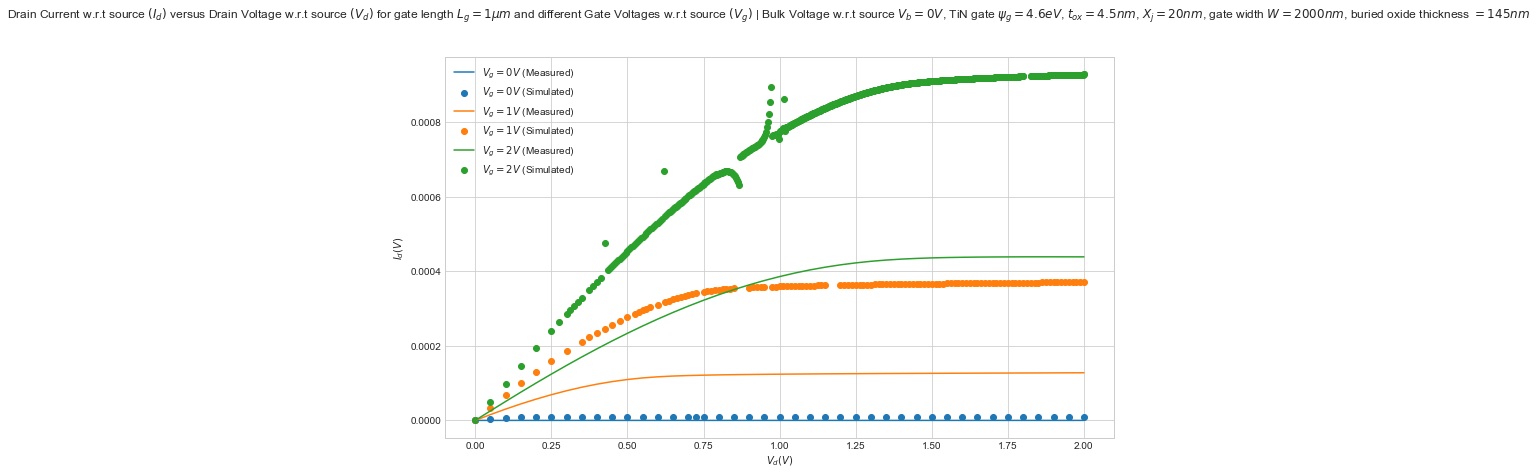

In [27]:
fig,axes = plt.subplots(figsize=(12, 7))
fig.suptitle('Drain Current w.r.t source $(I_d)$ versus Drain Voltage w.r.t source $(V_d)$ for gate length $L_g = 1\mu m$ and different Gate Voltages w.r.t source $(V_g)$ | Bulk Voltage w.r.t source $V_{b}= 0V$, TiN gate $\psi_g = 4.6eV$, $t_{ox} = 4.5nm$, $X_j = 20nm$, gate width $W = 2000nm$, buried oxide thickness $ = 145nm$')
plt.plot(NIdVd_1um_Vg0['DrainV(1)'],NIdVd_1um_Vg0['DrainI(1)'],label='$V_g = 0V$ (Measured)')
plt.scatter(NIdVd_1um_Sim_Vg0[0],NIdVd_1um_Sim_Vg0[1],label='$V_g = 0V$ (Simulated)')
plt.plot(NIdVd_1um_Vg1['DrainV(11)'],NIdVd_1um_Vg1['DrainI(11)'],label='$V_g = 1V$ (Measured)')
plt.scatter(NIdVd_1um_Sim_Vg1[0],NIdVd_1um_Sim_Vg1[1],label='$V_g = 1V$ (Simulated)')
plt.plot(NIdVd_1um_Vg2['DrainV(21)'],NIdVd_1um_Vg2['DrainI(21)'],label='$V_g = 2V$ (Measured)')
plt.scatter(NIdVd_1um_Sim_Vg2[0],NIdVd_1um_Sim_Vg2[1],label='$V_g = 2V$ (Simulated)')
axes.legend(loc='best')
axes.set_xlabel('$V_d (V)$')
axes.set_ylabel('$I_d (V)$')

### Summary <a class="anchor" id="section_4_2_1"></a>

1. $I_d$ vs $V_d \forall V_g$ plots of SOI MOSFETs can be seen to follow the generic MOSFET IV trend:
<a id="eq5"></a>
$$
\begin{equation}\tag{5}
I_d = \frac{W}{L}\cdot C_{oxe}\cdot \mu \cdot(V_g - V_T - \frac{1}{2}V_d)\cdot V_d
\end{equation}
$$

2. Descrepencies in respective measured vs simulated values $\forall L_g$ can be attributed to slight physical process variations in effective $L_g$ and/or $T_{oxe}$ of the measured SOI MOSFETs.
3. Simulations in this section were carried out using the abacus tool at nanoHUB. It contains generic physical models for simulating various IV relations of MOSFETs.
4. Simulated $I_d$ vs $V_d @ V_g = 2V$ curve has points off in $V_d = [0.3:1.2]V$ because the physical model in abacus capturing respective $I_d$ / $V_d$ relation has not converged well. This can be resolved with increased channel nodes and shorter bias steps, simulating which can take a day's worth of compute and hence not possible in abacus.

# Discussion and Conclusion

1. The slight curvature in the subthreshold region of $\log I_d$ vs $V_g @ V_d = high$ plots in certain simulated and measured MOSFETs might seem to lead to an overestimated $V_T$ and hence affect respective DIBL values. But generic relations presented in equations [Eq. (1)](#eq1), [Eq. (2)](#eq2), [Eq. (3)](#eq3), [Eq. (4)](#eq4) and [Eq. (5)](#eq5) have been verified to hold in all respective sections, regardless.

# References
- [1] **[Modern Semiconductor Devices for Integrated Circuits - Chenming Hu](https://www.chu.berkeley.edu/modern-semiconductor-devices-for-integrated-circuits-chenming-calvin-hu-2010/)**
- [2] **[Nanometer CMOS ICs: From Basics to ASICs - Harry Veendrick](https://link.springer.com/book/10.1007/978-3-319-47597-4)**

# Additional information

<b>Created by:</b> Rochish Manda, MSc KTH

<b>IH2657 Examiner:</b> Dr. Gunnar Malm, Professor KTH

<b>Data and config file at:</b> Github